In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("D:\Data\measures_v2.csv")

In [4]:
df.shape

(1330816, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [6]:
profile_ids= list(df['profile_id'].unique())

In [7]:
import matplotlib.pyplot as plt

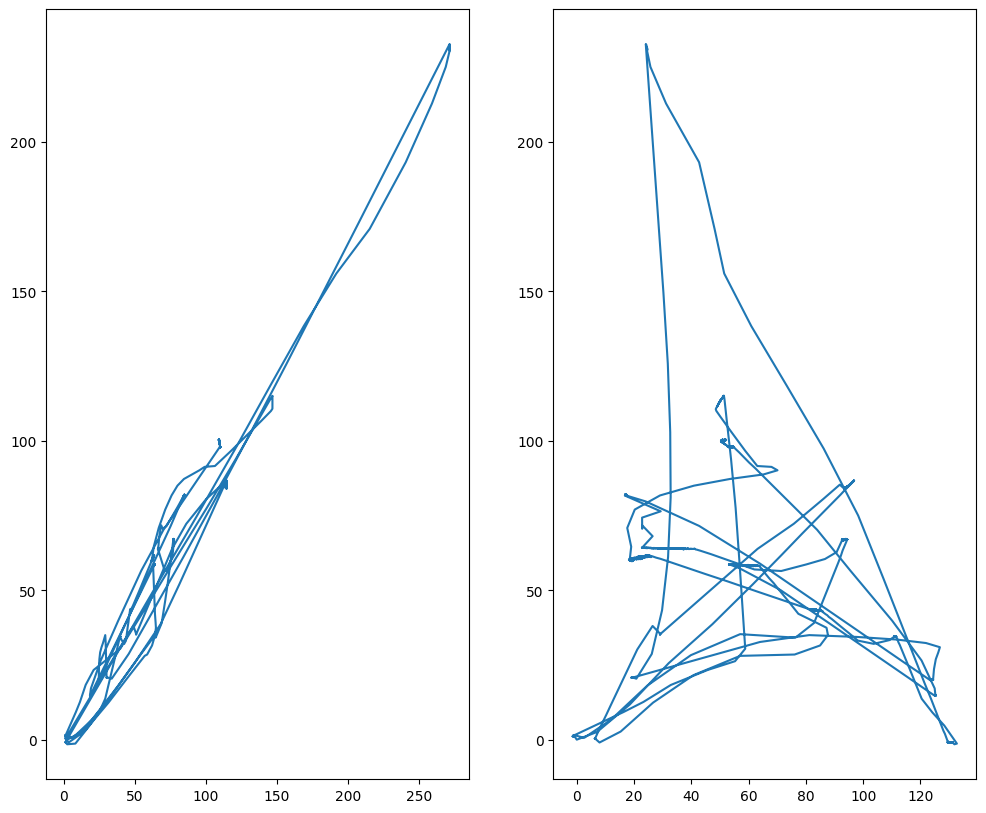

In [8]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.plot(df[df['profile_id']==20]['i_q'],df[df['profile_id']==20]['torque'])

plt.subplot(1,2,2)
plt.plot(df[df['profile_id']==20]['u_q'],df[df['profile_id']==20]['torque'])

In [9]:
condition1 = df['profile_id']==20
condition2 = df['torque']>1

conditions = condition1 & condition2

Text(0, 0.5, 'Torque')

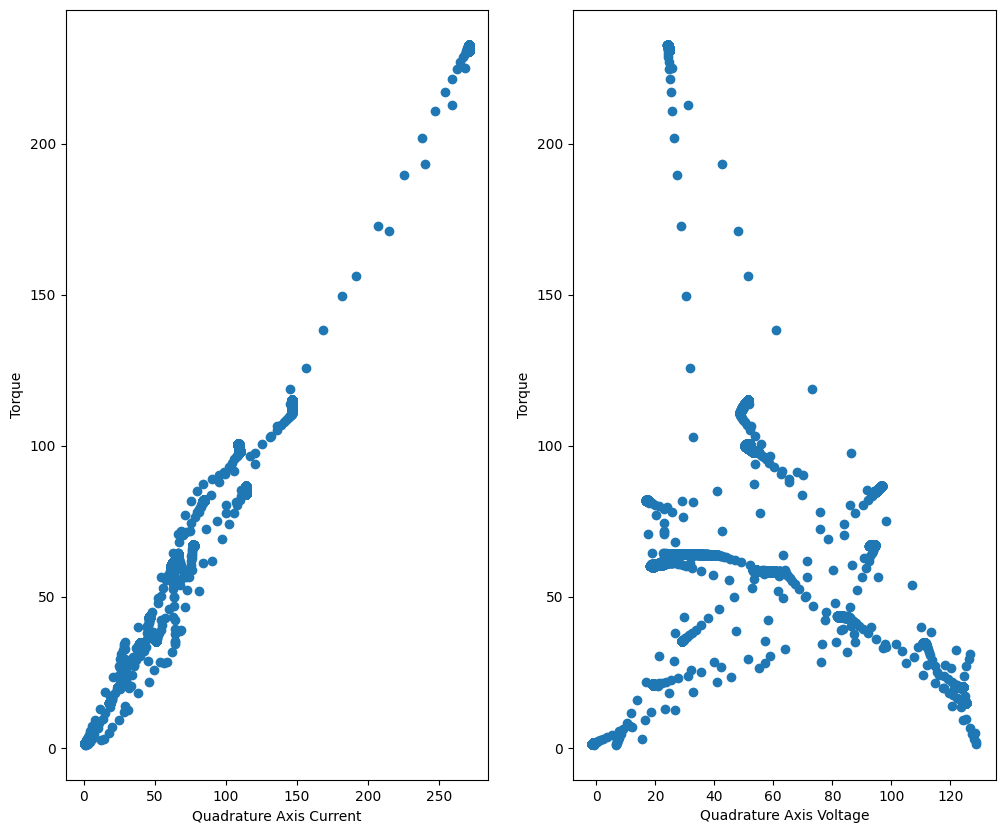

In [10]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.scatter(df[conditions]['i_q'],df[conditions]['torque'])
plt.xlabel('Quadrature Axis Current')
plt.ylabel('Torque')

plt.subplot(1,2,2)
plt.scatter(df[conditions]['u_q'],df[conditions]['torque'])
plt.xlabel('Quadrature Axis Voltage')
plt.ylabel('Torque')

Text(0, 0.5, 'Rotor Temperature')

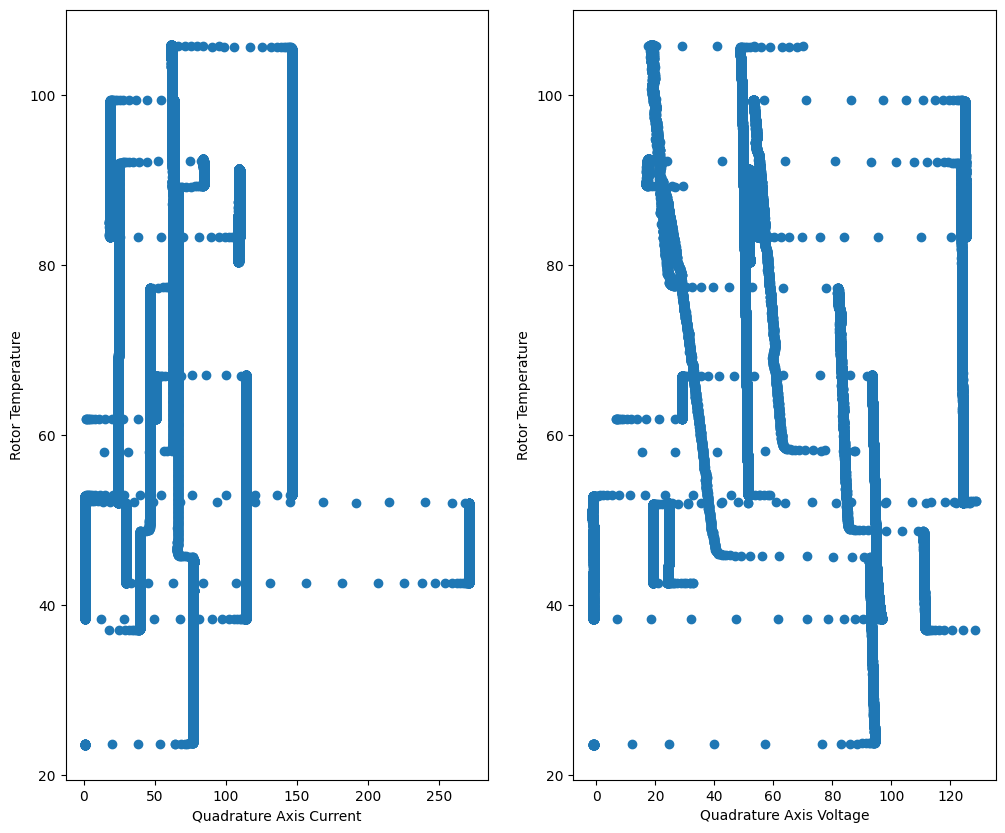

In [11]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.scatter(df[conditions]['i_q'],df[conditions]['pm'])
plt.xlabel('Quadrature Axis Current')
plt.ylabel('Rotor Temperature')

plt.subplot(1,2,2)
plt.scatter(df[conditions]['u_q'],df[conditions]['pm'])
plt.xlabel('Quadrature Axis Voltage')
plt.ylabel('Rotor Temperature')

Text(0, 0.5, 'Quadrature Axis Voltage')

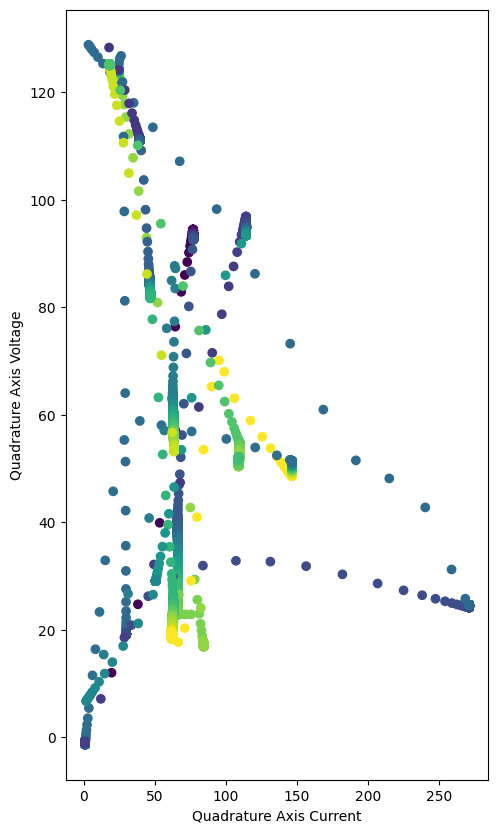

In [12]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.scatter(df[conditions]['i_q'],df[conditions]['u_q'],c=df[conditions]['pm'])
plt.xlabel('Quadrature Axis Current')
plt.ylabel('Quadrature Axis Voltage')



In [13]:
condition1 = df['profile_id']==20
condition2 = df['motor_speed']>0

conditions = condition1 & condition2

Text(0, 0.5, 'Torque')

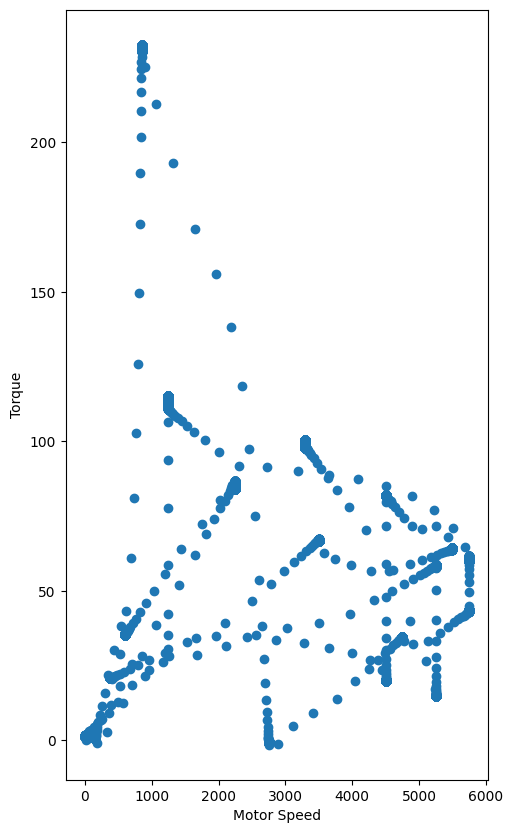

In [14]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.scatter(df[conditions]['motor_speed'],df[conditions]['torque'])
plt.xlabel('Motor Speed')
plt.ylabel('Torque')

In [15]:
df['profile_id'].value_counts().sort_values(ascending=False)

profile_id
20    43971
6     40388
65    40094
18    37732
66    36476
      ...  
51     6261
64     6250
52     3726
46     2180
47     2176
Name: count, Length: 69, dtype: int64

In [16]:
df.groupby(['profile_id']).max(['motor_speed'])

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
profile_id,,,,,,,,,,,,
2,8.798512,19.774647,103.282516,1.701082,72.121727,100.552002,0.001466,242.425613,45.985561,52.602722,23.391573,208.290604
3,7.685420,19.441357,39.101830,1.676021,31.375229,100.289642,-1.997104,132.618668,29.011612,26.451857,22.903128,103.782623
4,131.707565,19.915617,113.379204,1.768284,85.289497,6000.015137,-1.761789,204.655823,99.396629,57.372833,26.295944,177.273438
5,50.067646,19.969273,43.397926,-0.124184,35.824593,1000.435913,-1.996639,132.619171,39.938965,29.698214,23.719465,103.667618
6,131.816772,67.271606,121.034332,131.469788,93.053024,4999.962402,-1.964792,215.243591,93.512962,79.482719,30.230392,200.855942
...,...,...,...,...,...,...,...,...,...,...,...,...
76,131.297179,93.397468,117.889581,129.982475,104.203503,5945.497772,-1.996641,273.157233,82.554532,95.847868,27.581238,226.387913
78,131.326573,81.489642,100.850035,129.409371,86.130511,5901.991122,-1.996878,250.956331,68.029359,78.709559,25.851851,209.480142
79,132.099303,92.894291,128.246583,129.719580,110.638638,5947.926912,-1.996796,299.618486,97.153271,97.831907,26.384509,248.605450


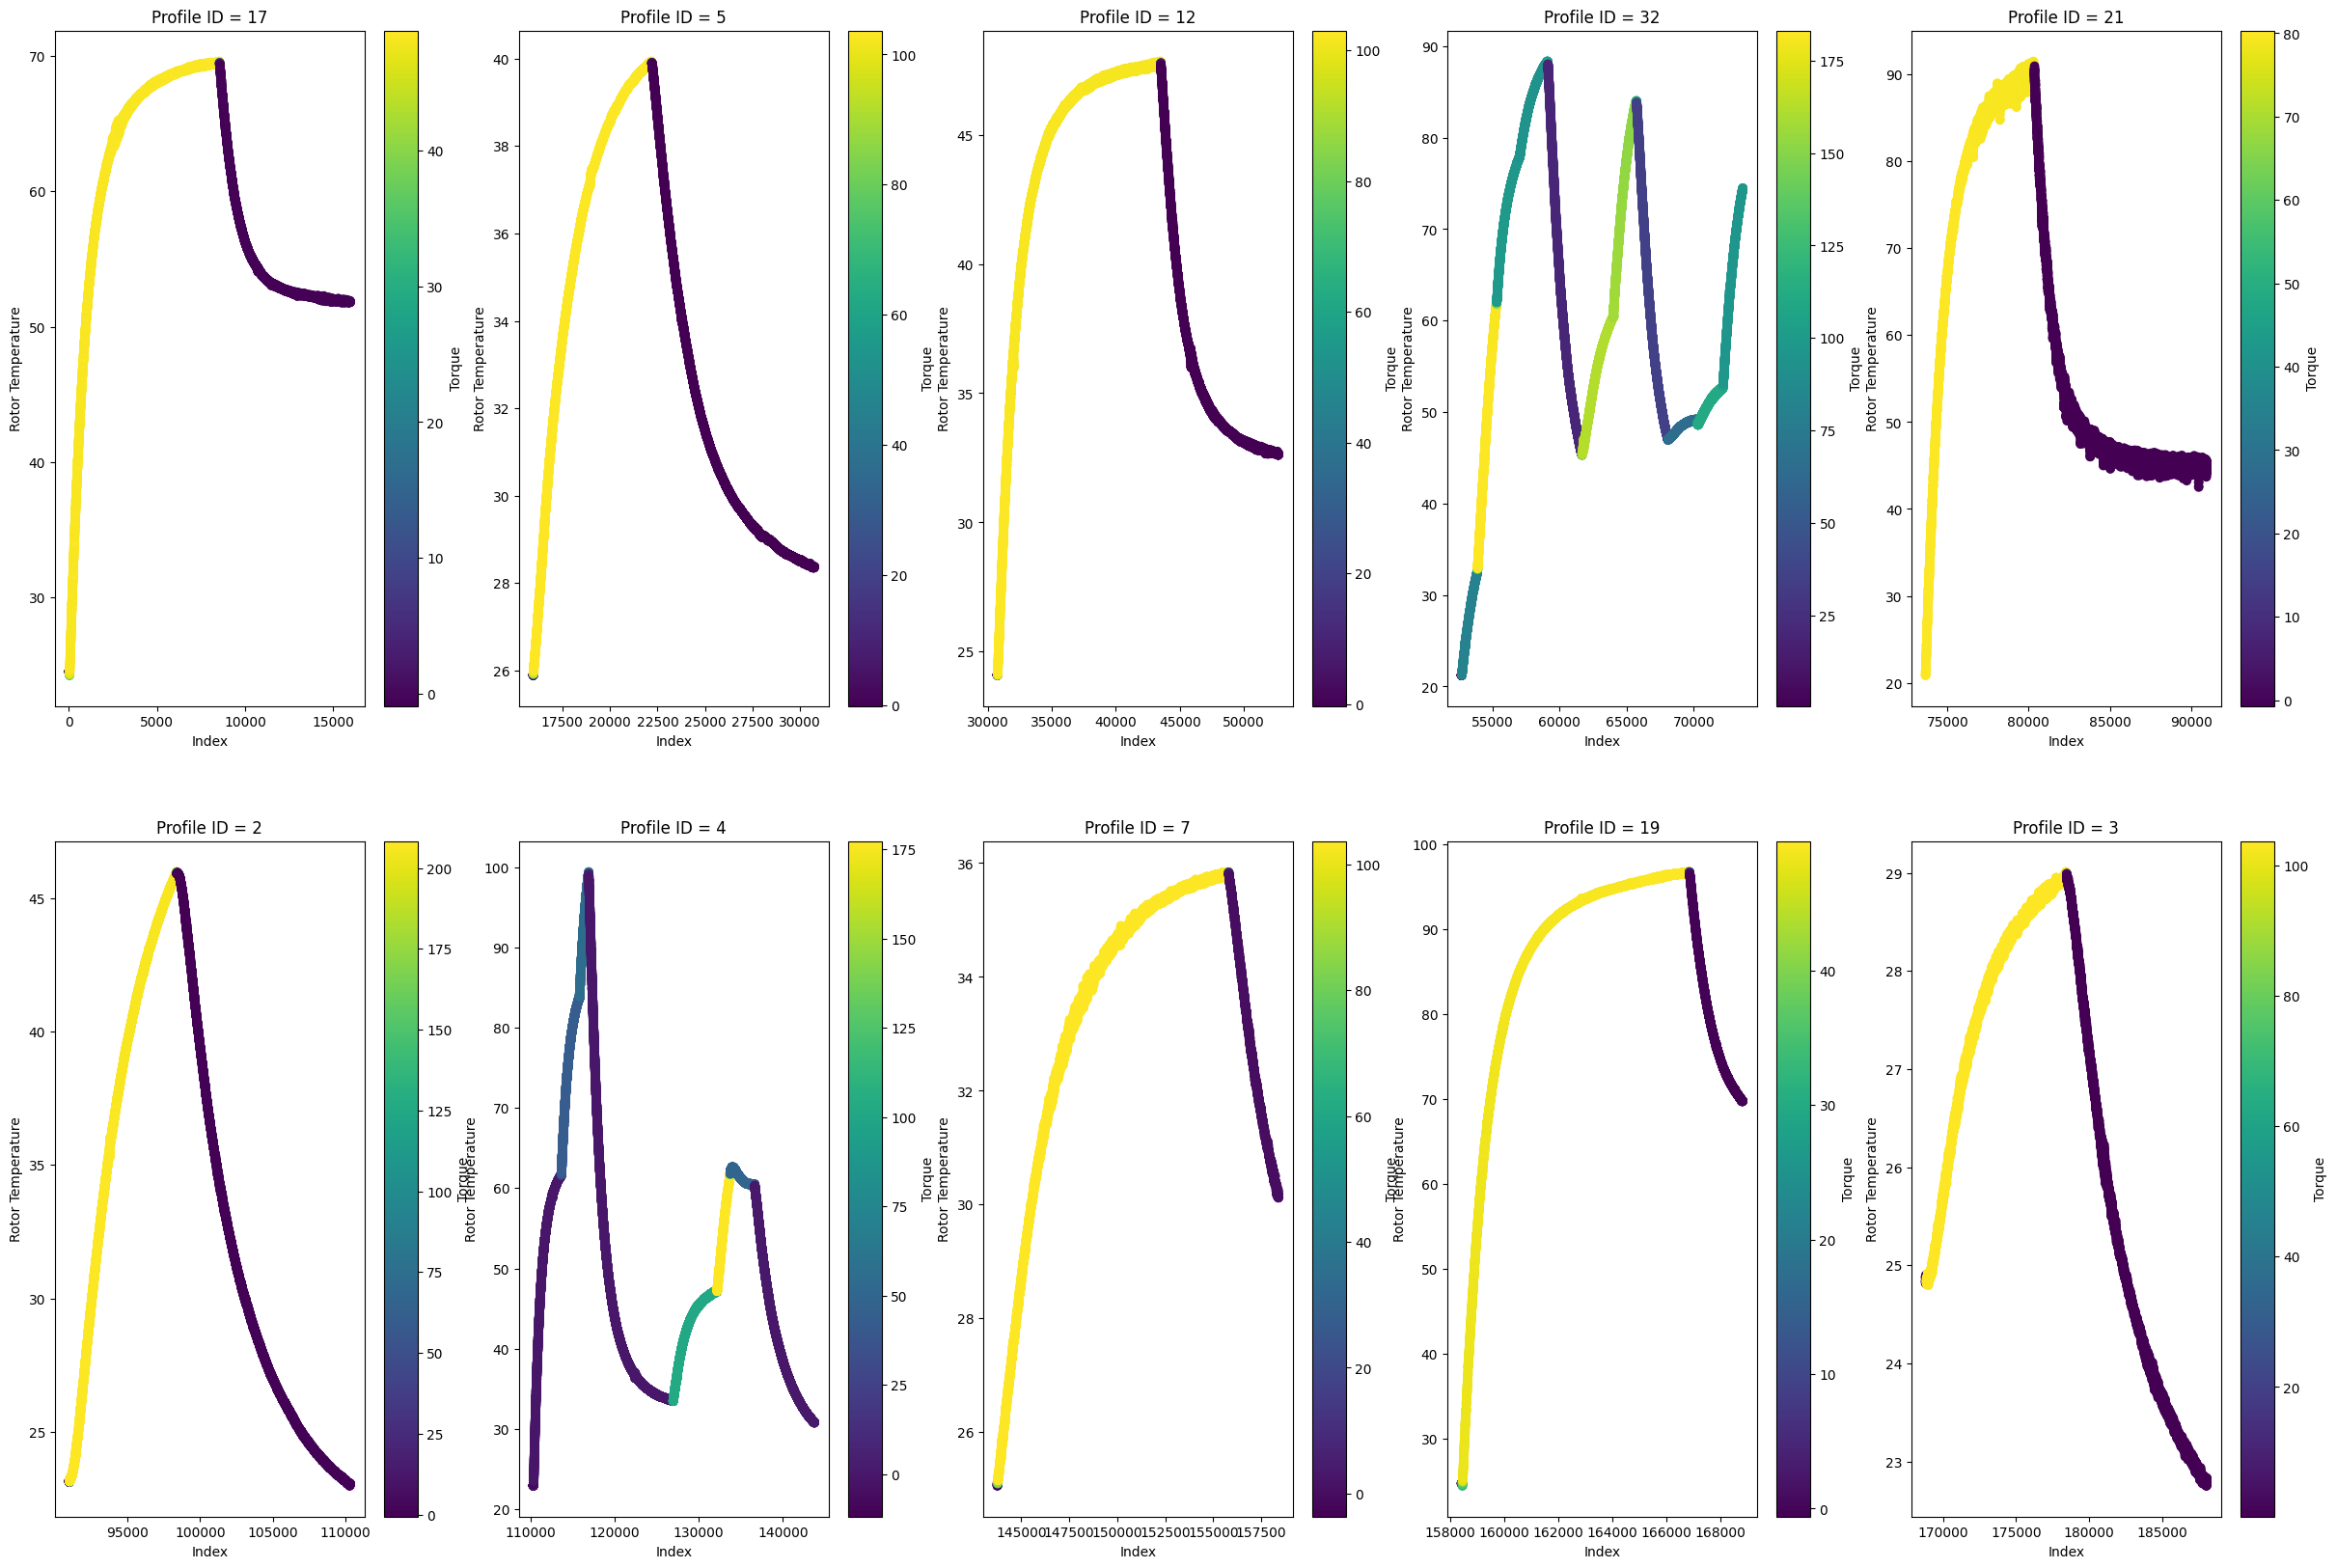

In [17]:
profiles = df['profile_id'].unique()
plt.figure(figsize=(30,20))
for i in range(10):
    profile_id=profiles[i]
    condition = df['profile_id']==profile_id

    plt.subplot(2,5,i+1)
    plt.scatter(df[condition].index, df[condition]['pm'], c=df[condition]['torque'])
    plt.ylabel('Rotor Temperature')
    plt.xlabel('Index')
    plt.colorbar(label='Torque')
    plt.title('Profile ID = '+str(profile_id))

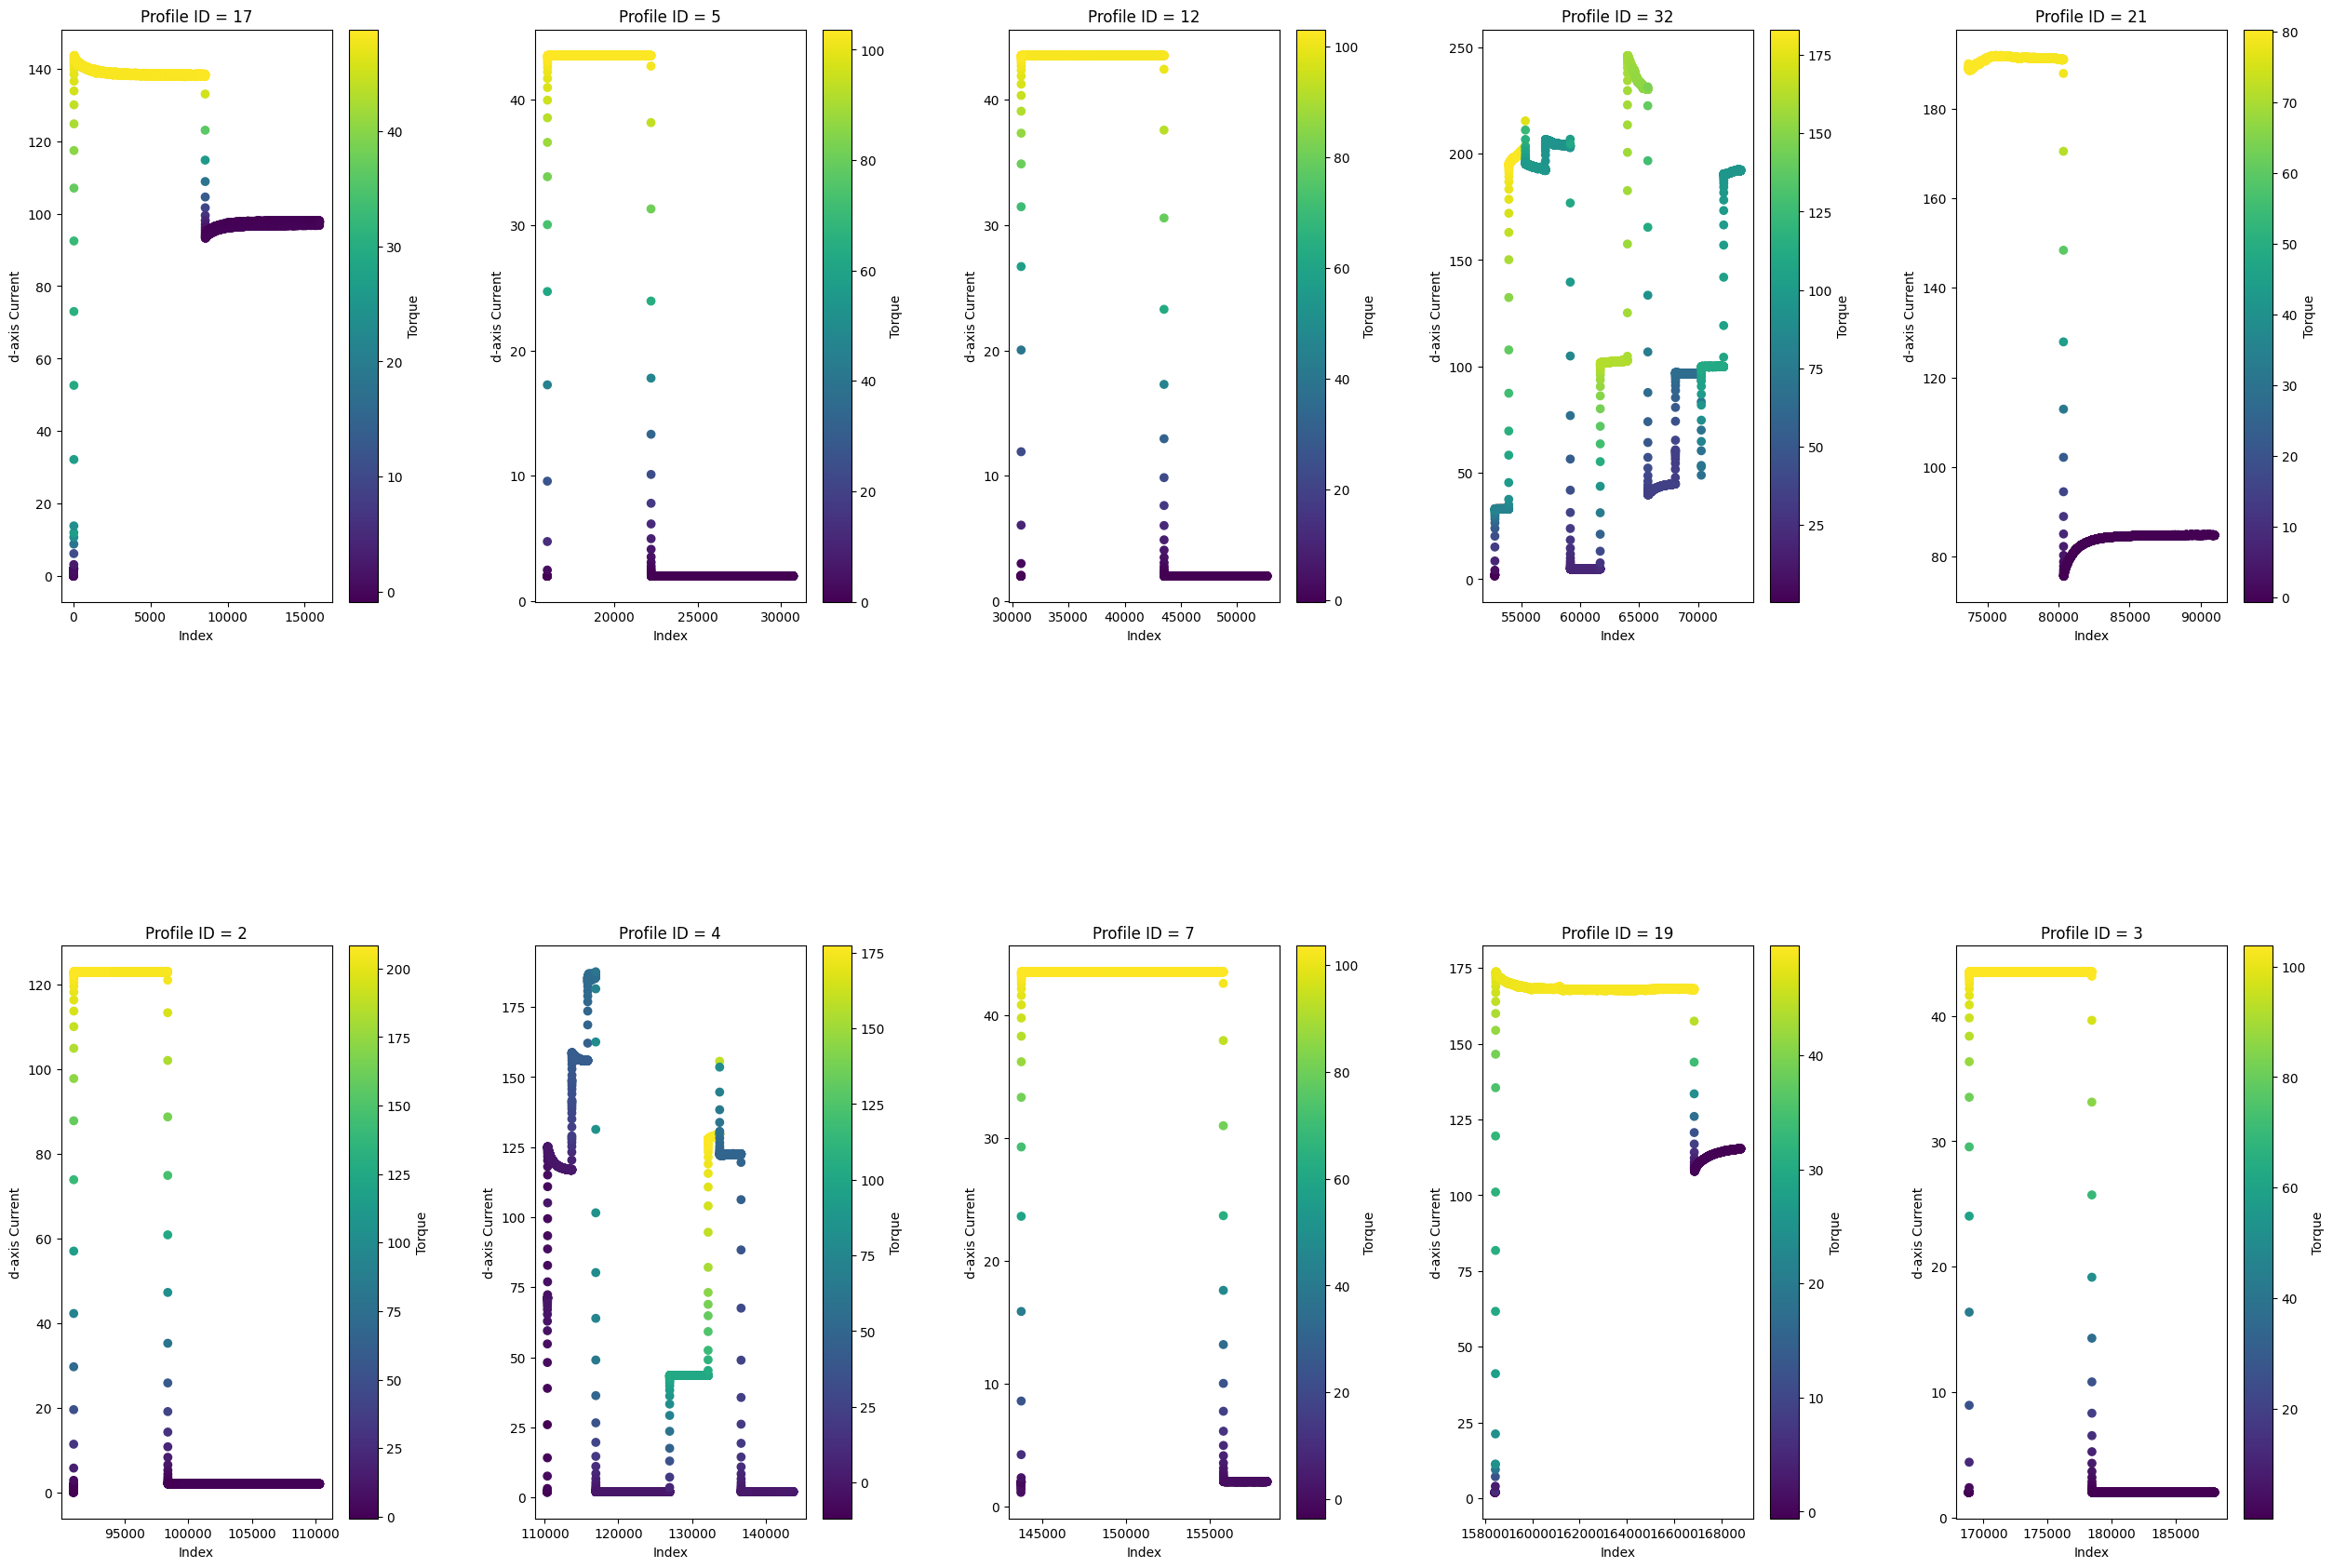

In [18]:
profiles = df['profile_id'].unique()
plt.figure(figsize=(30,20))
for i in range(10):
    profile_id=profiles[i]
    condition = df['profile_id']==profile_id

    plt.subplot(2,5,i+1)
    plt.scatter(df[condition].index, -df[condition]['i_d'], c=df[condition]['torque'])
    plt.ylabel('d-axis Current')
    plt.xlabel('Index')
    plt.colorbar(label='Torque')
    plt.title('Profile ID = '+str(profile_id))
    plt.subplots_adjust(wspace=0.4, hspace=0.6, left=0.1, right=0.9, top=0.9, bottom=0.1)


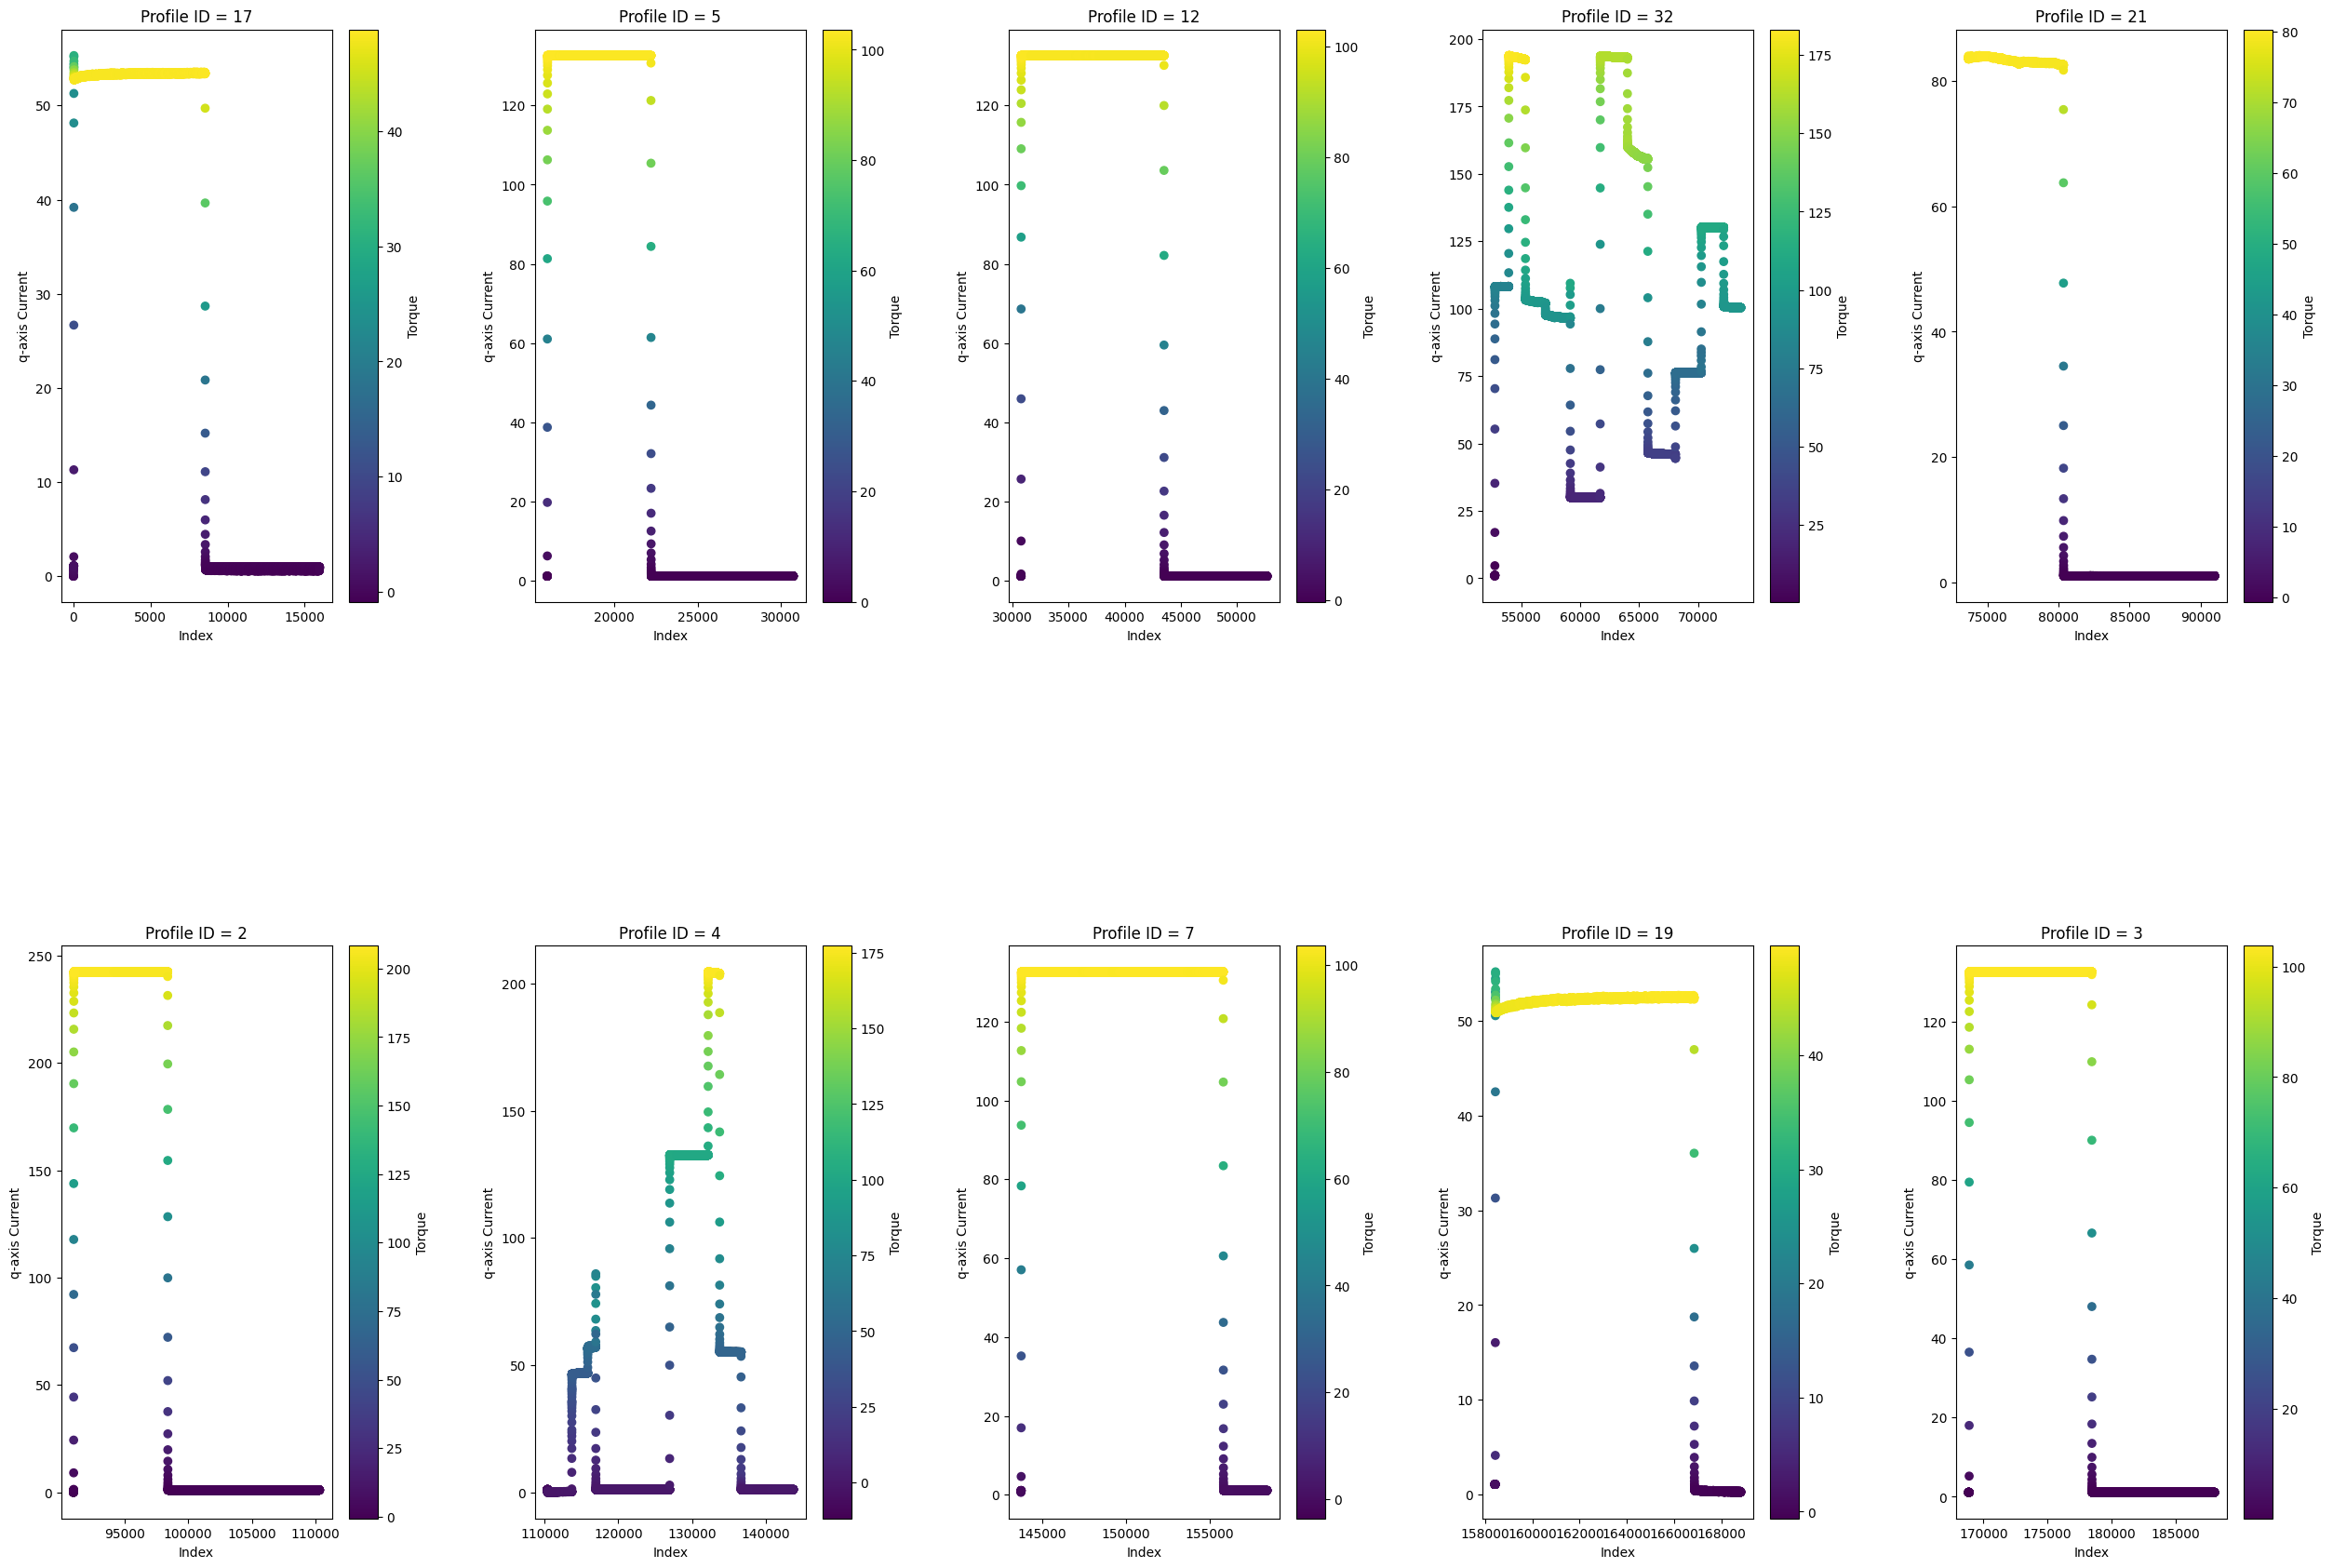

In [19]:
profiles = df['profile_id'].unique()
plt.figure(figsize=(30,20))
for i in range(10):
    profile_id=profiles[i]
    condition = df['profile_id']==profile_id

    plt.subplot(2,5,i+1)
    plt.scatter(df[condition].index, df[condition]['i_q'], c=df[condition]['torque'])
    plt.ylabel('q-axis Current')
    plt.xlabel('Index')
    plt.colorbar(label='Torque')
    plt.title('Profile ID = '+str(profile_id))
    plt.subplots_adjust(wspace=0.4, hspace=0.6, left=0.1, right=0.9, top=0.9, bottom=0.1)

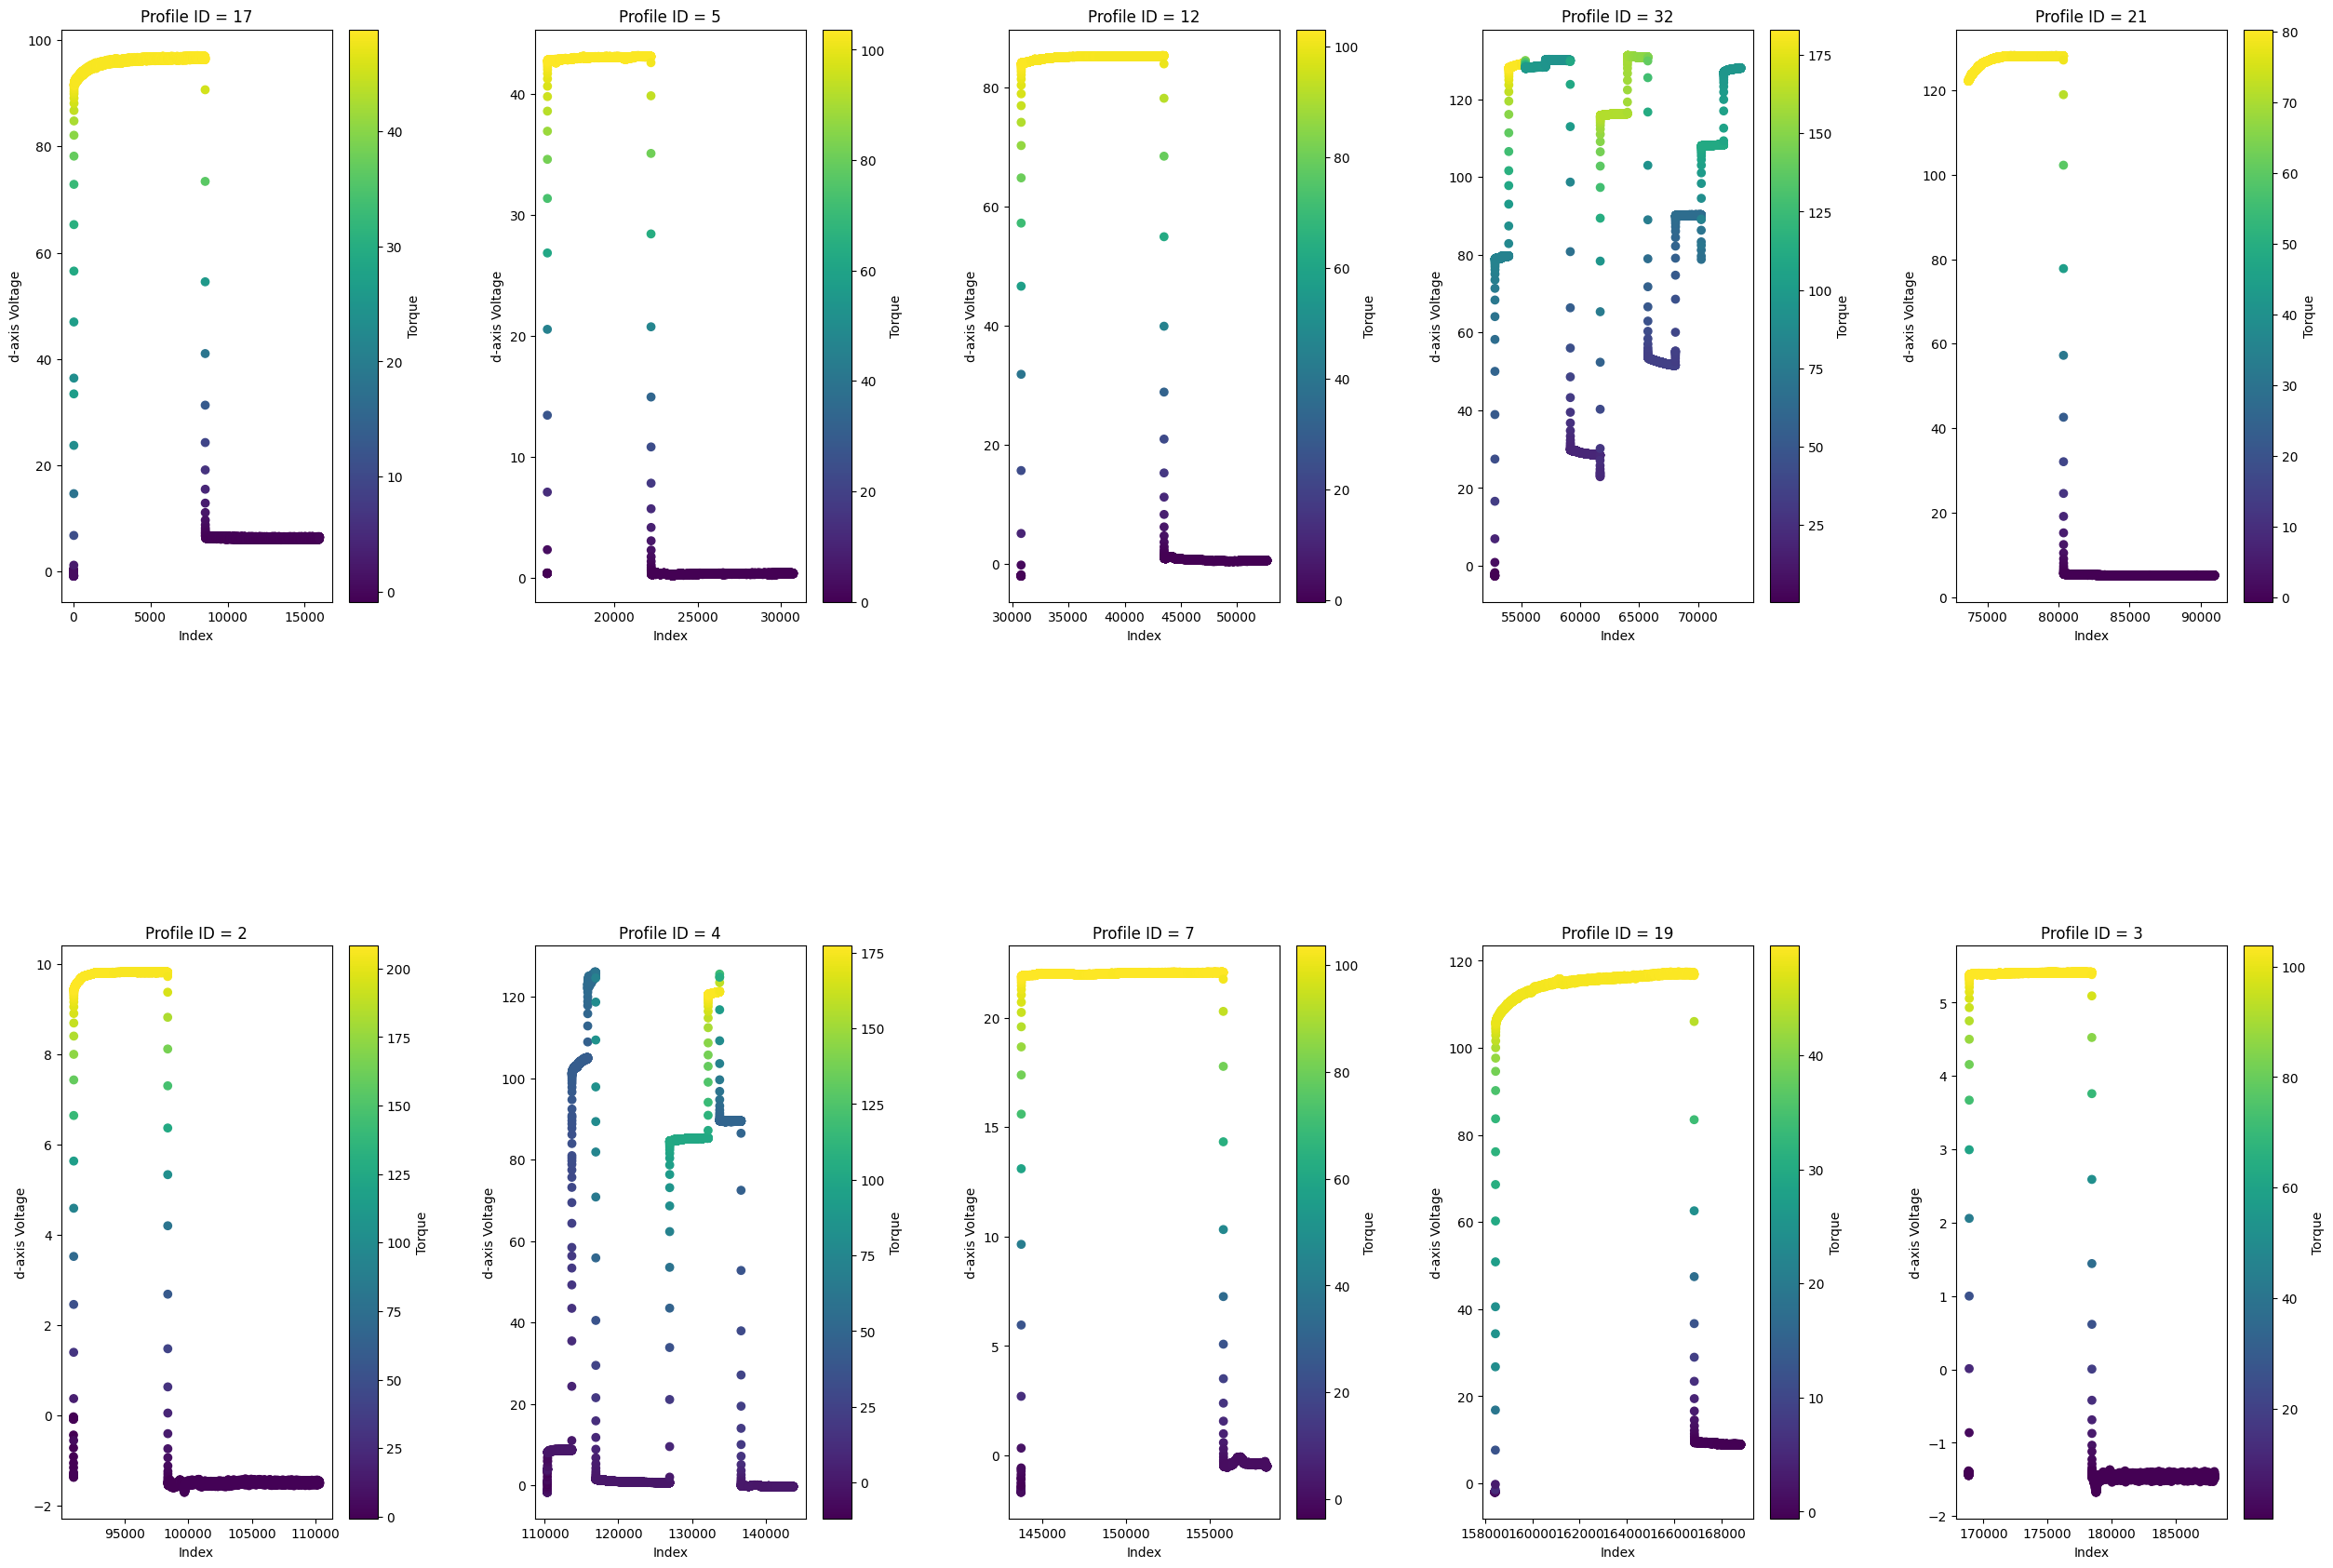

In [20]:
profiles = df['profile_id'].unique()
plt.figure(figsize=(30,20))
for i in range(10):
    profile_id=profiles[i]
    condition = df['profile_id']==profile_id

    plt.subplot(2,5,i+1)
    plt.scatter(df[condition].index, -df[condition]['u_d'], c=df[condition]['torque'])
    plt.ylabel('d-axis Voltage')
    plt.xlabel('Index')
    plt.colorbar(label='Torque')
    plt.title('Profile ID = '+str(profile_id))
    plt.subplots_adjust(wspace=0.4, hspace=0.6, left=0.1, right=0.9, top=0.9, bottom=0.1)

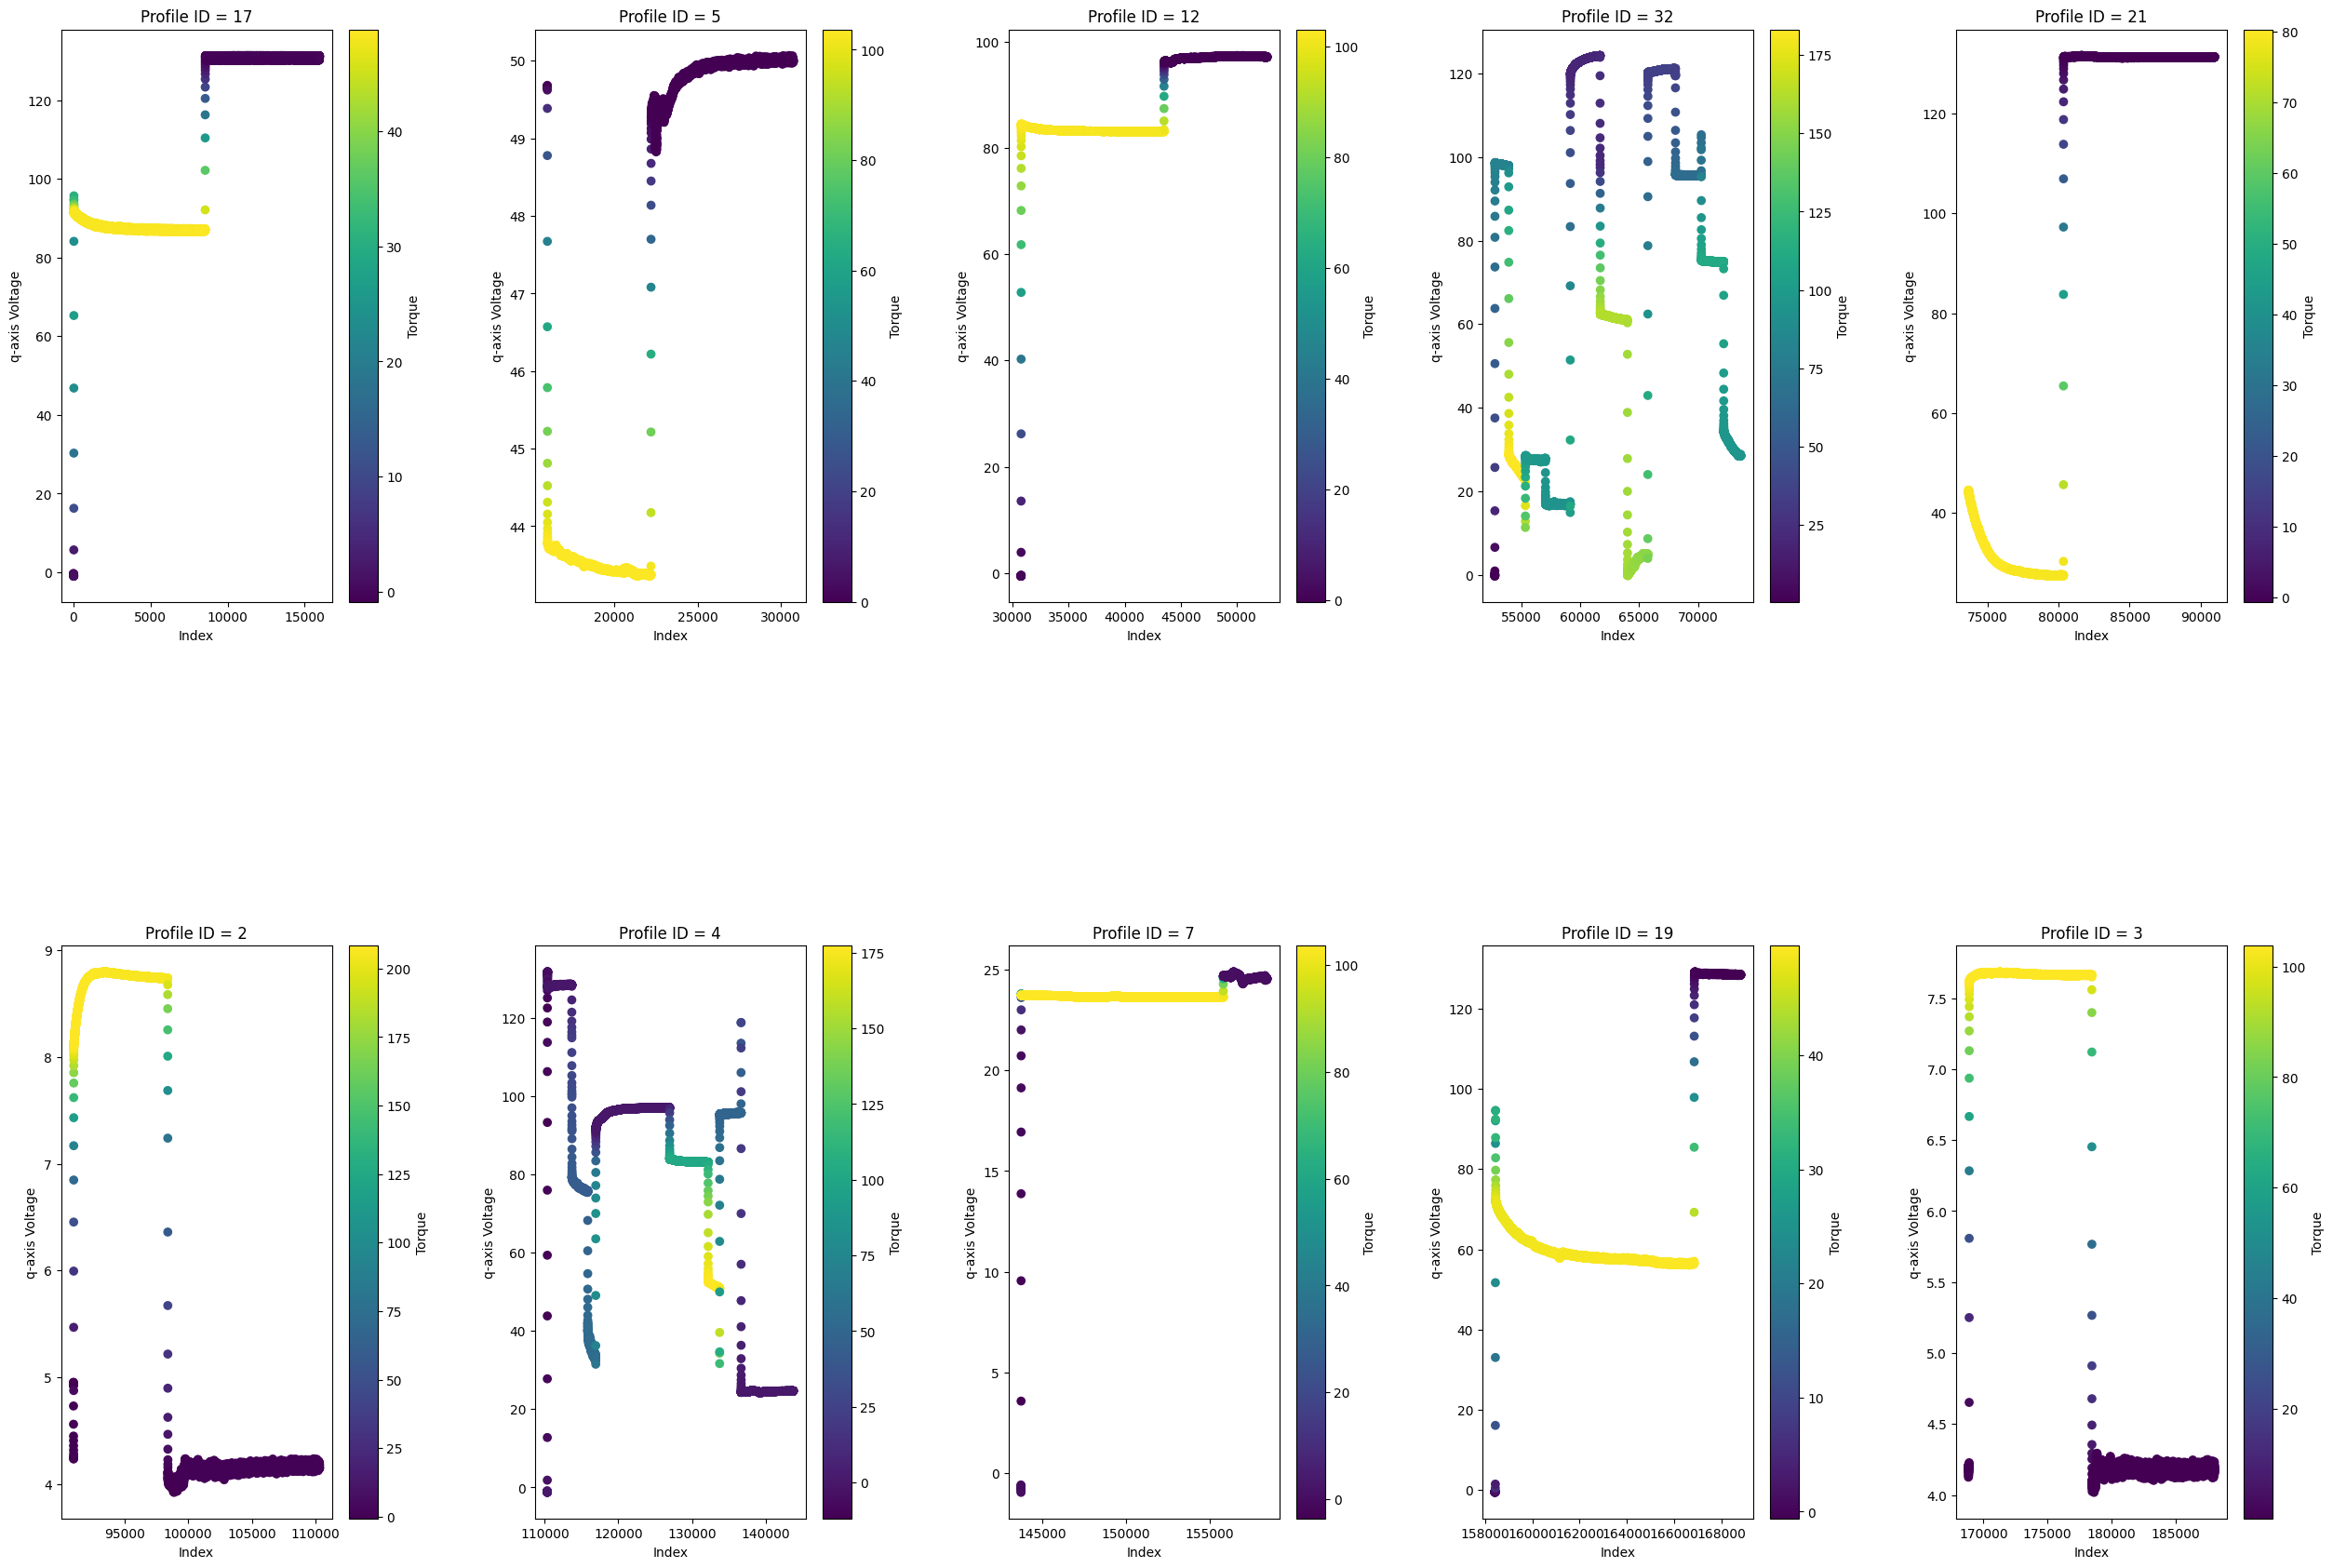

In [21]:
profiles = df['profile_id'].unique()
plt.figure(figsize=(30,20))
for i in range(10):
    profile_id=profiles[i]
    condition = df['profile_id']==profile_id

    plt.subplot(2,5,i+1)
    plt.scatter(df[condition].index, df[condition]['u_q'], c=df[condition]['torque'])
    plt.ylabel('q-axis Voltage')
    plt.xlabel('Index')
    plt.colorbar(label='Torque')
    plt.title('Profile ID = '+str(profile_id))
    plt.subplots_adjust(wspace=0.4, hspace=0.6, left=0.1, right=0.9, top=0.9, bottom=0.1)

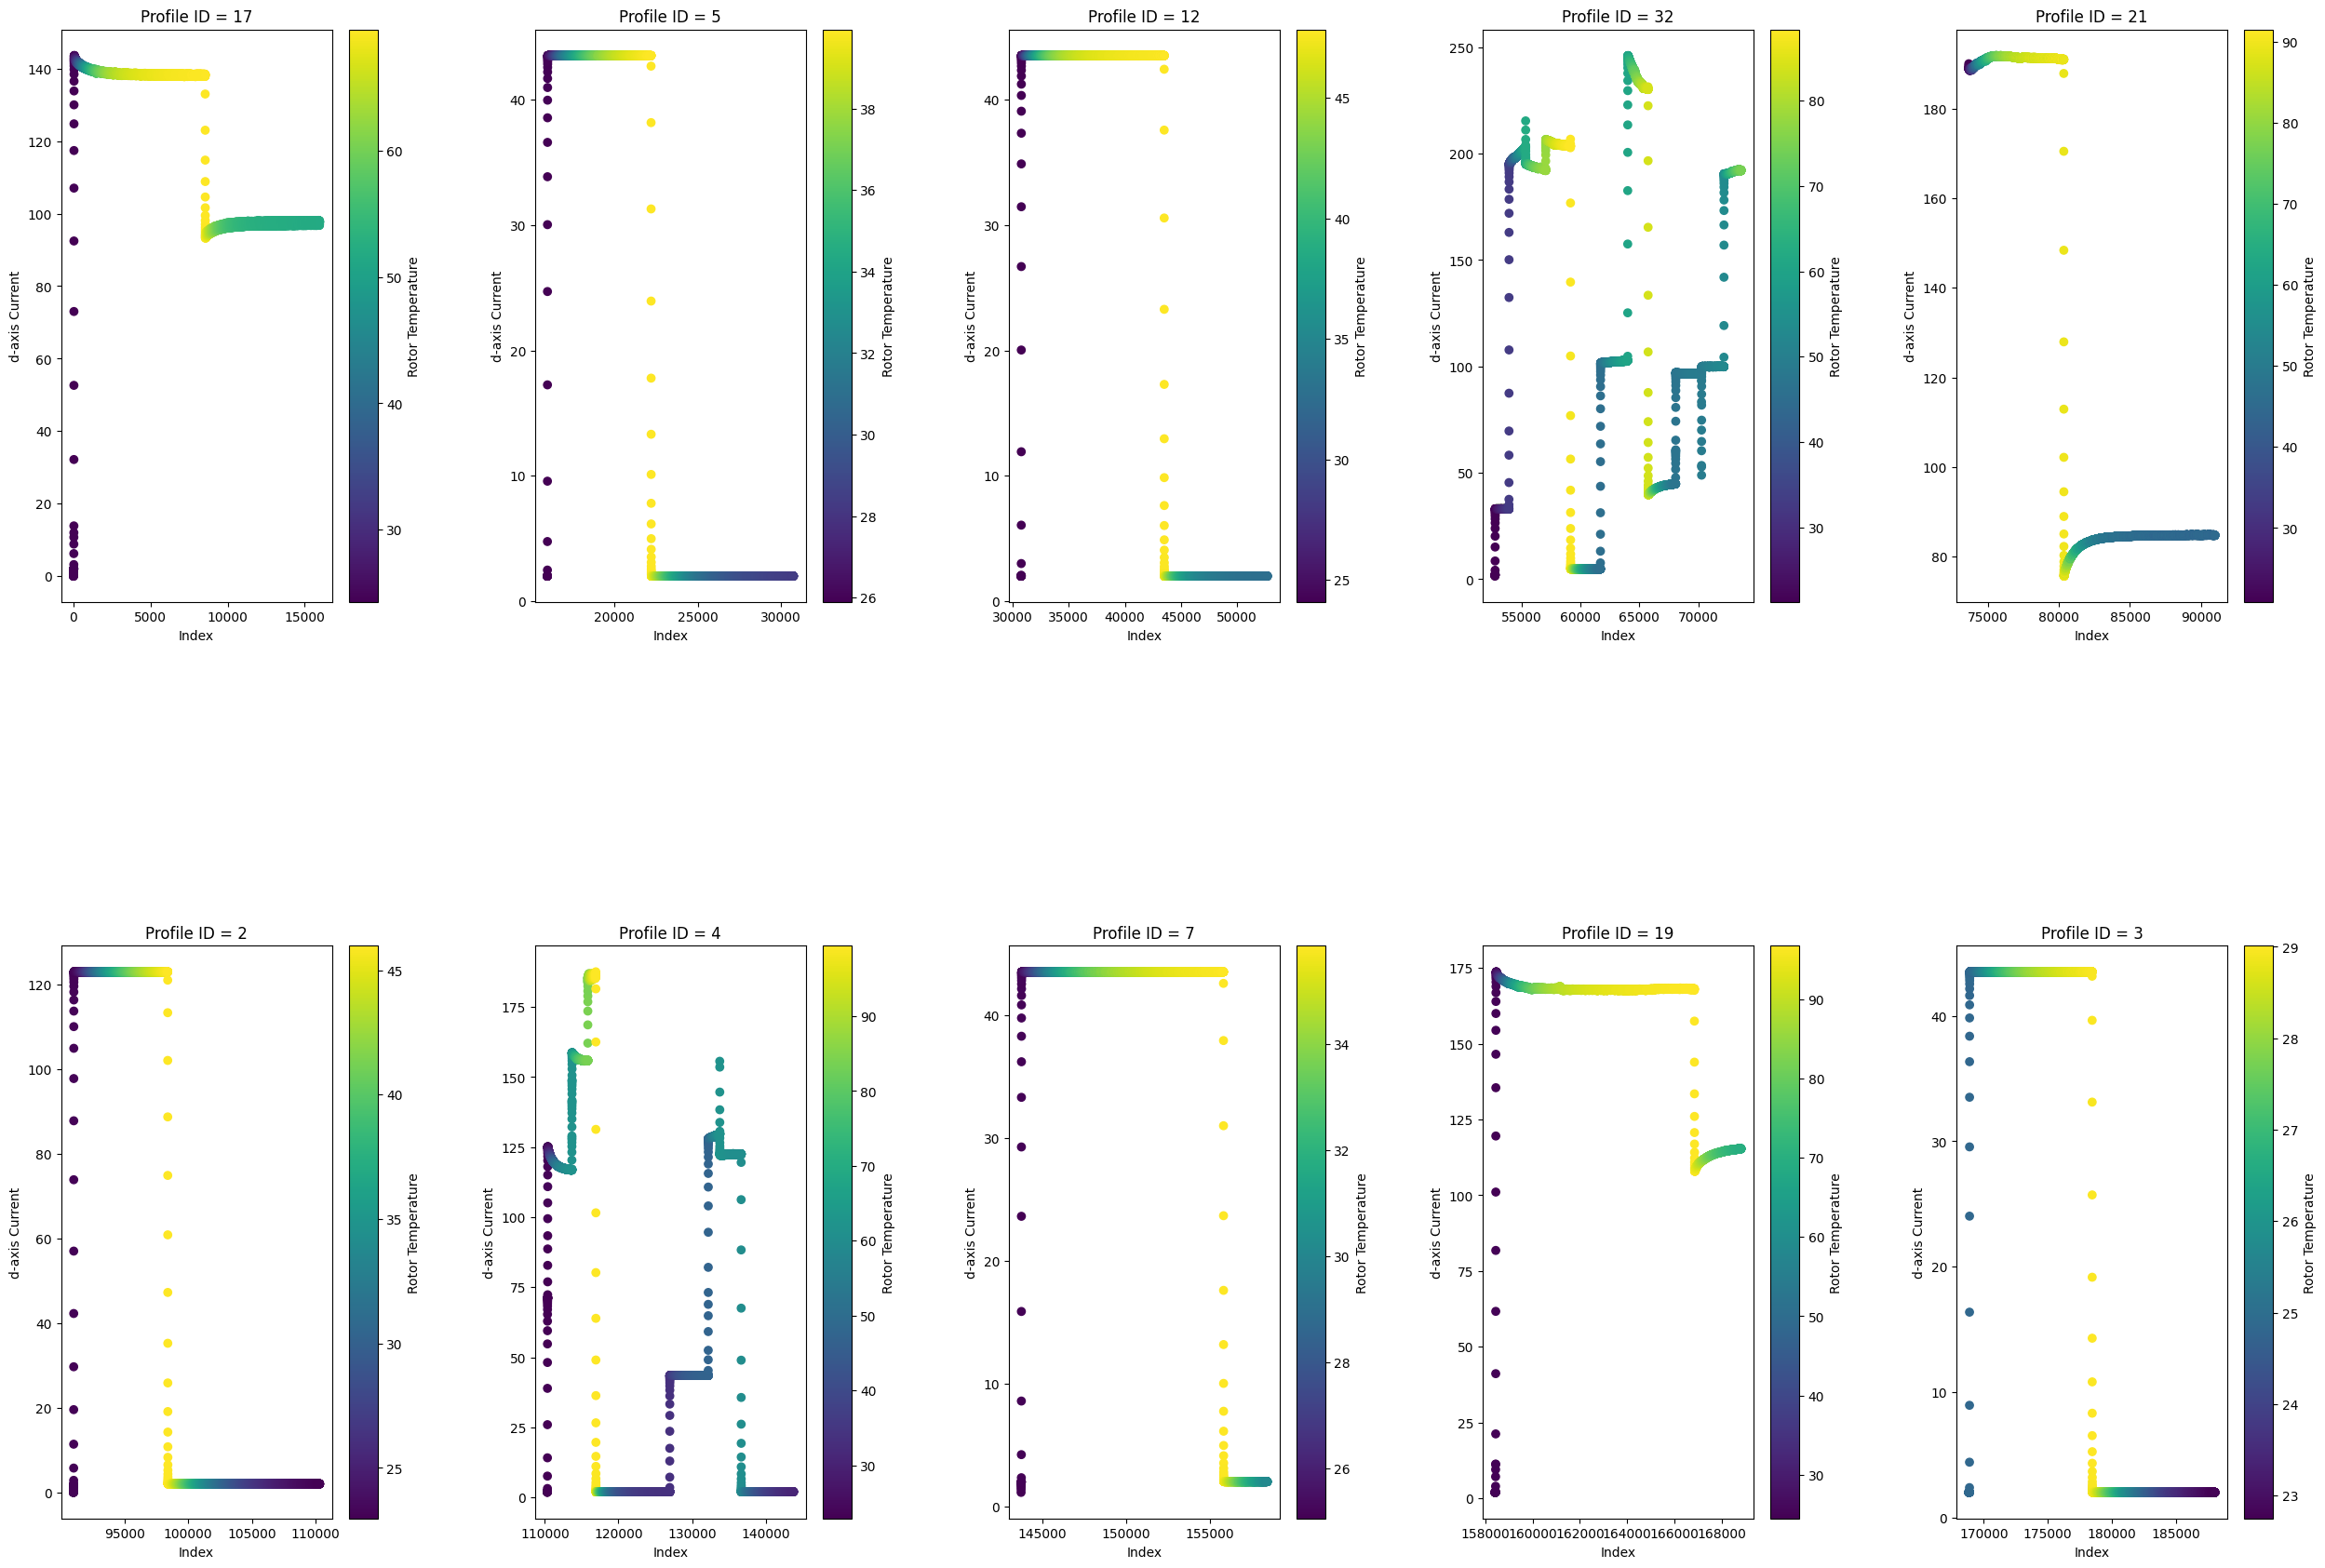

In [22]:
profiles = df['profile_id'].unique()
plt.figure(figsize=(30,20))
for i in range(10):
    profile_id=profiles[i]
    condition = df['profile_id']==profile_id

    plt.subplot(2,5,i+1)
    plt.scatter(df[condition].index, -df[condition]['i_d'], c=df[condition]['pm'])
    plt.ylabel('d-axis Current')
    plt.xlabel('Index')
    plt.colorbar(label='Rotor Temperature')
    plt.title('Profile ID = '+str(profile_id))
    plt.subplots_adjust(wspace=0.4, hspace=0.6, left=0.1, right=0.9, top=0.9, bottom=0.1)

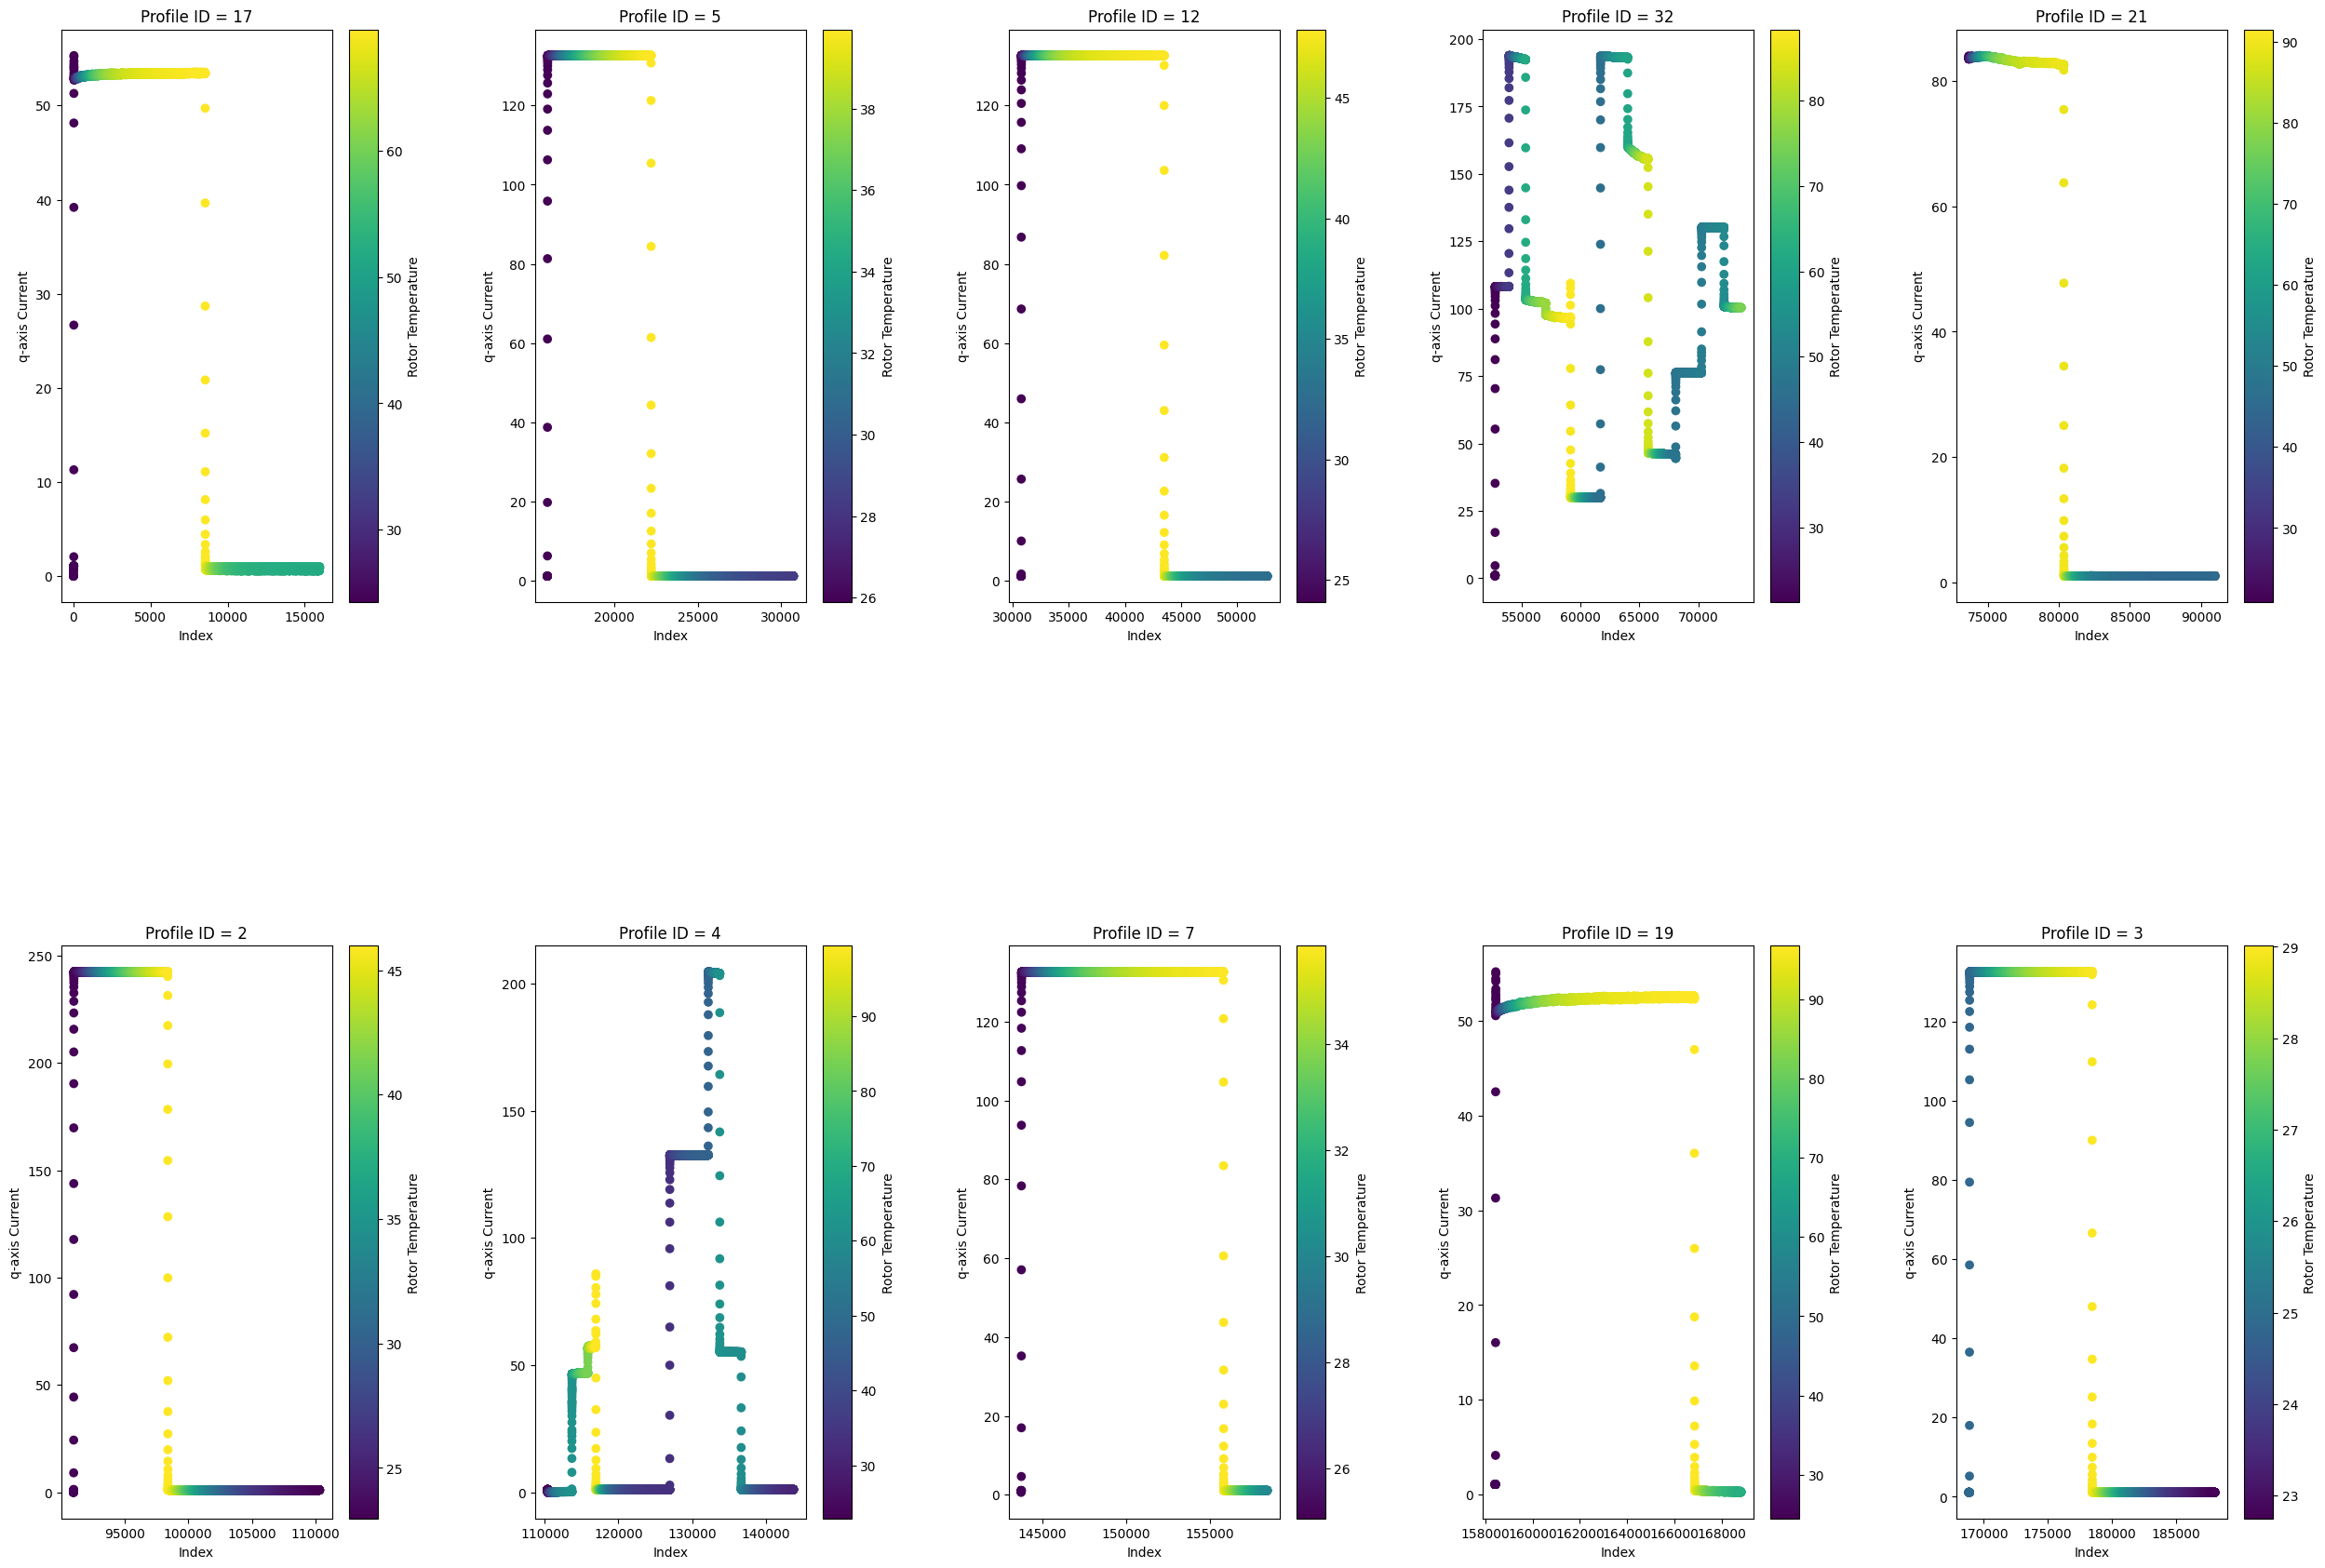

In [23]:
profiles = df['profile_id'].unique()
plt.figure(figsize=(30,20))
for i in range(10):
    profile_id=profiles[i]
    condition = df['profile_id']==profile_id

    plt.subplot(2,5,i+1)
    plt.scatter(df[condition].index, df[condition]['i_q'], c=df[condition]['pm'])
    plt.ylabel('q-axis Current')
    plt.xlabel('Index')
    plt.colorbar(label='Rotor Temperature')
    plt.title('Profile ID = '+str(profile_id))
    plt.subplots_adjust(wspace=0.4, hspace=0.6, left=0.1, right=0.9, top=0.9, bottom=0.1)

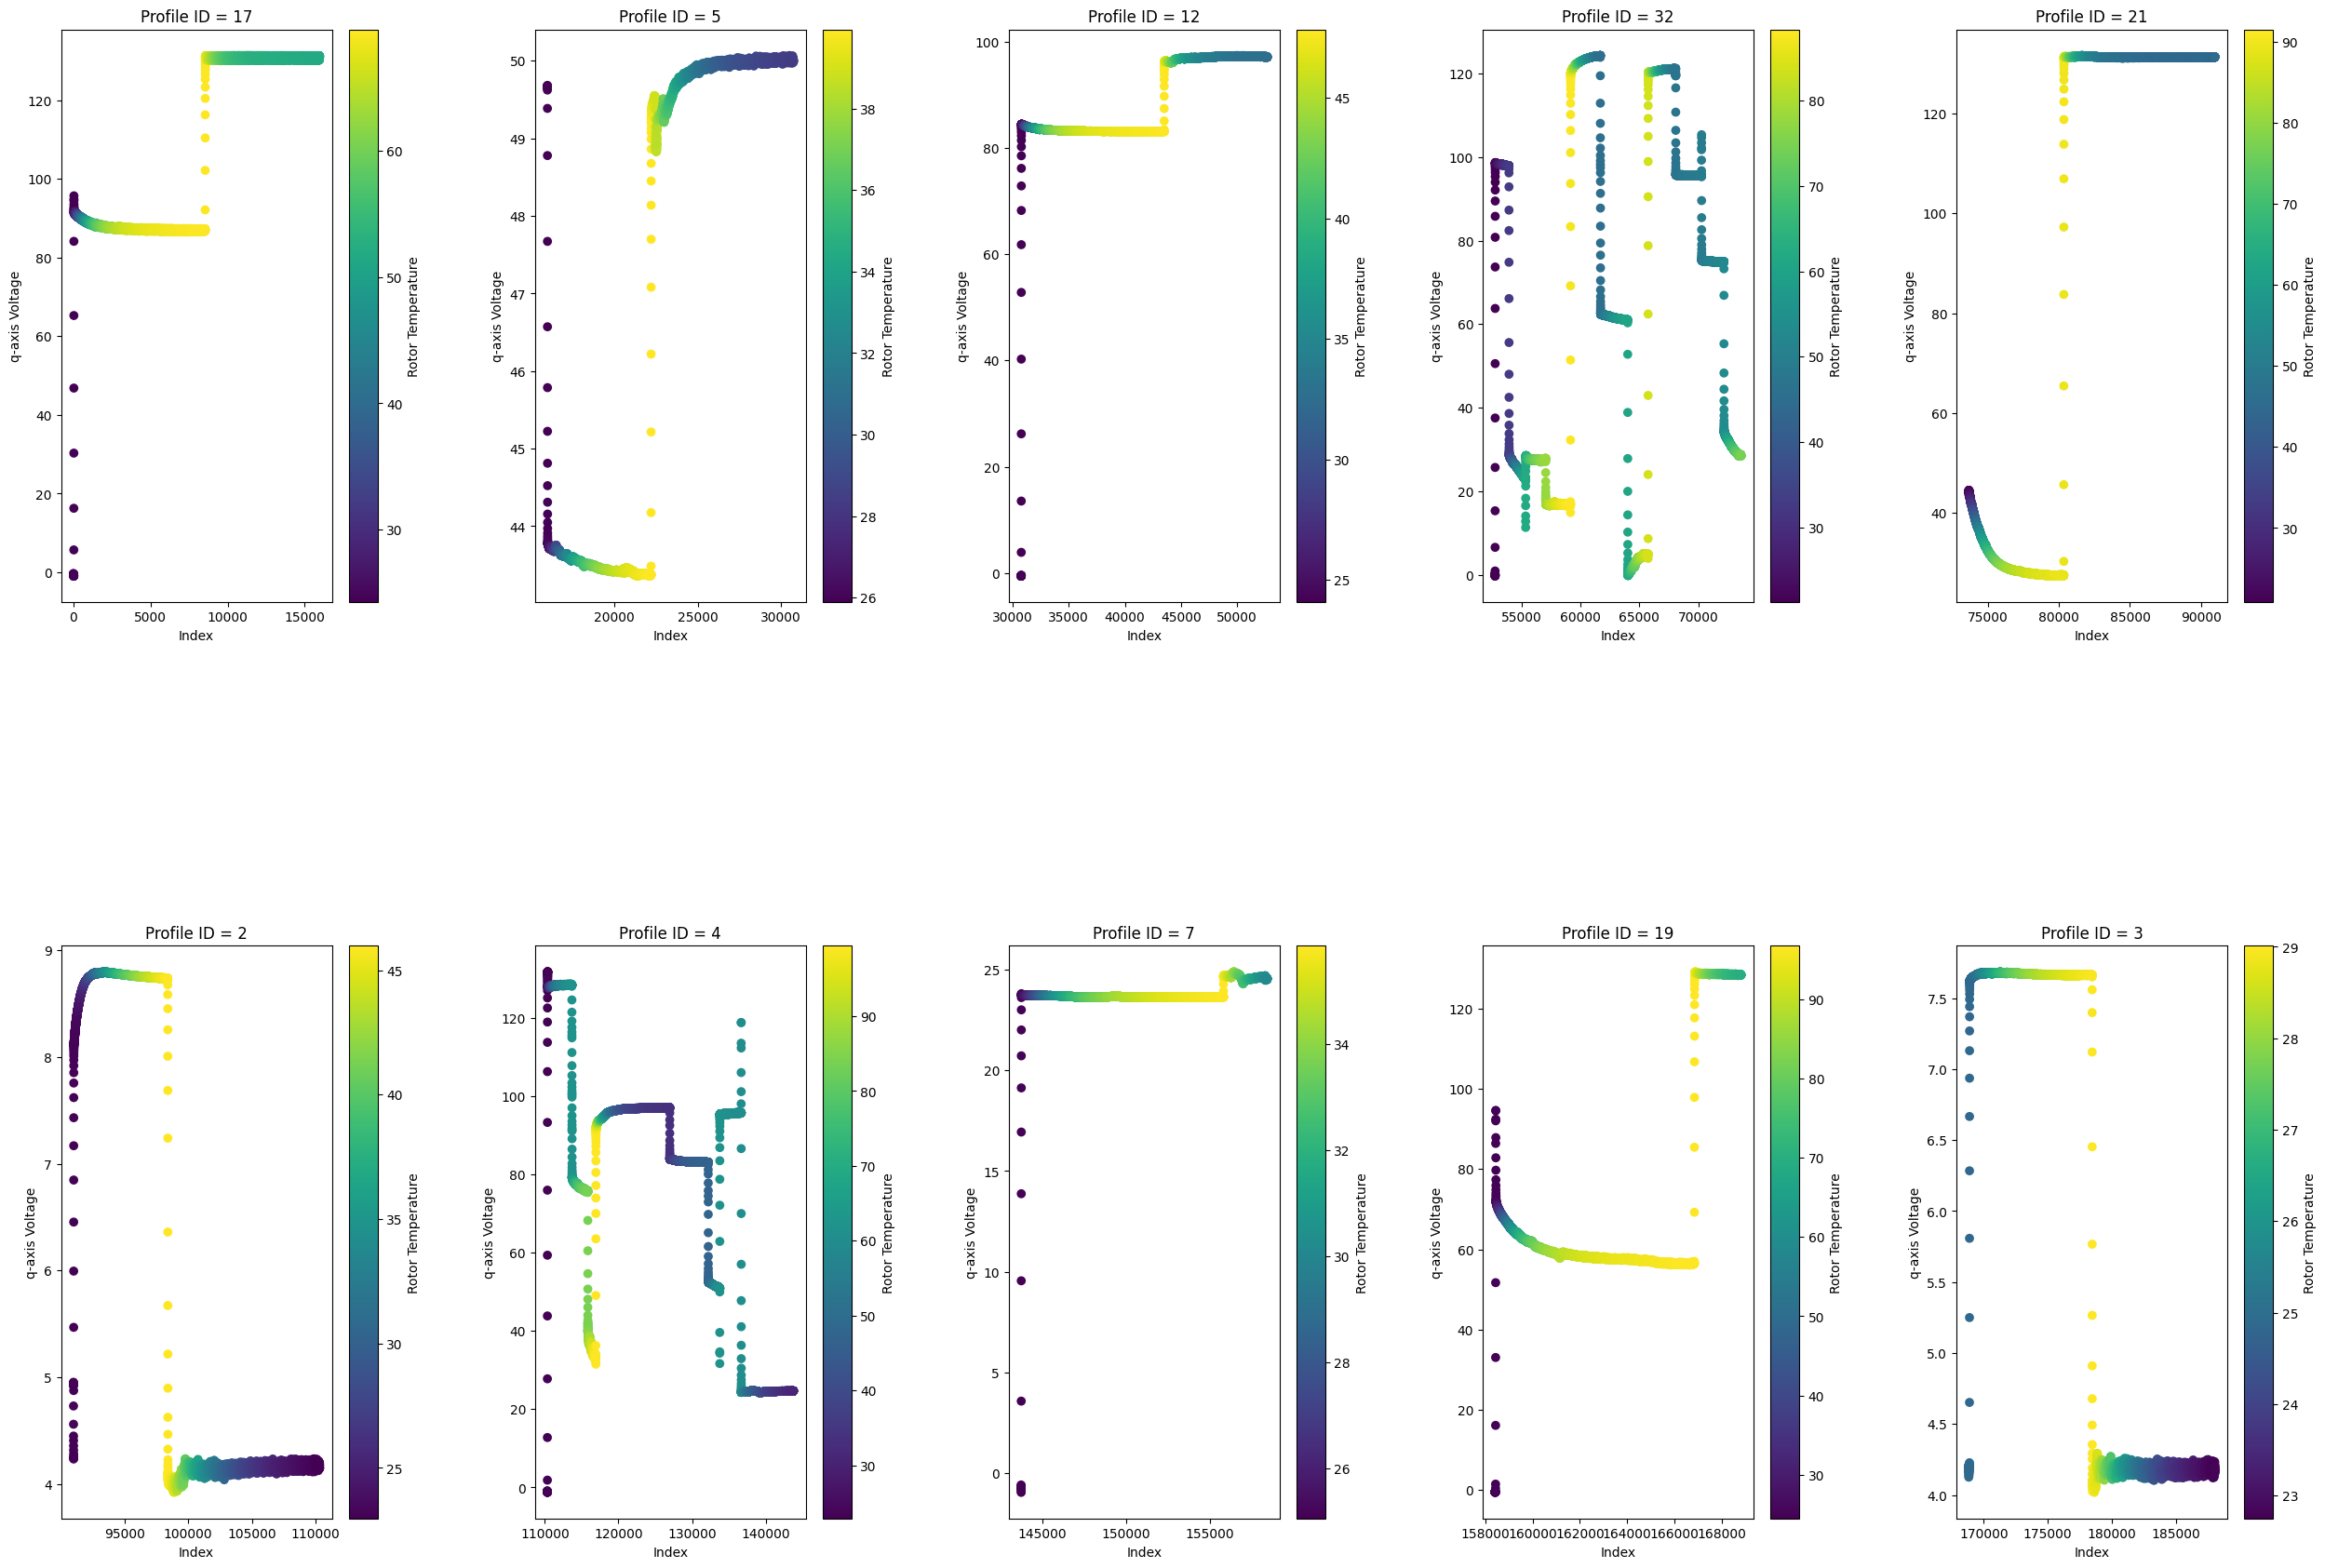

In [24]:
profiles = df['profile_id'].unique()
plt.figure(figsize=(30,20))
for i in range(10):
    profile_id=profiles[i]
    condition = df['profile_id']==profile_id

    plt.subplot(2,5,i+1)
    plt.scatter(df[condition].index, df[condition]['u_q'], c=df[condition]['pm'])
    plt.ylabel('q-axis Voltage')
    plt.xlabel('Index')
    plt.colorbar(label='Rotor Temperature')
    plt.title('Profile ID = '+str(profile_id))
    plt.subplots_adjust(wspace=0.4, hspace=0.6, left=0.1, right=0.9, top=0.9, bottom=0.1)

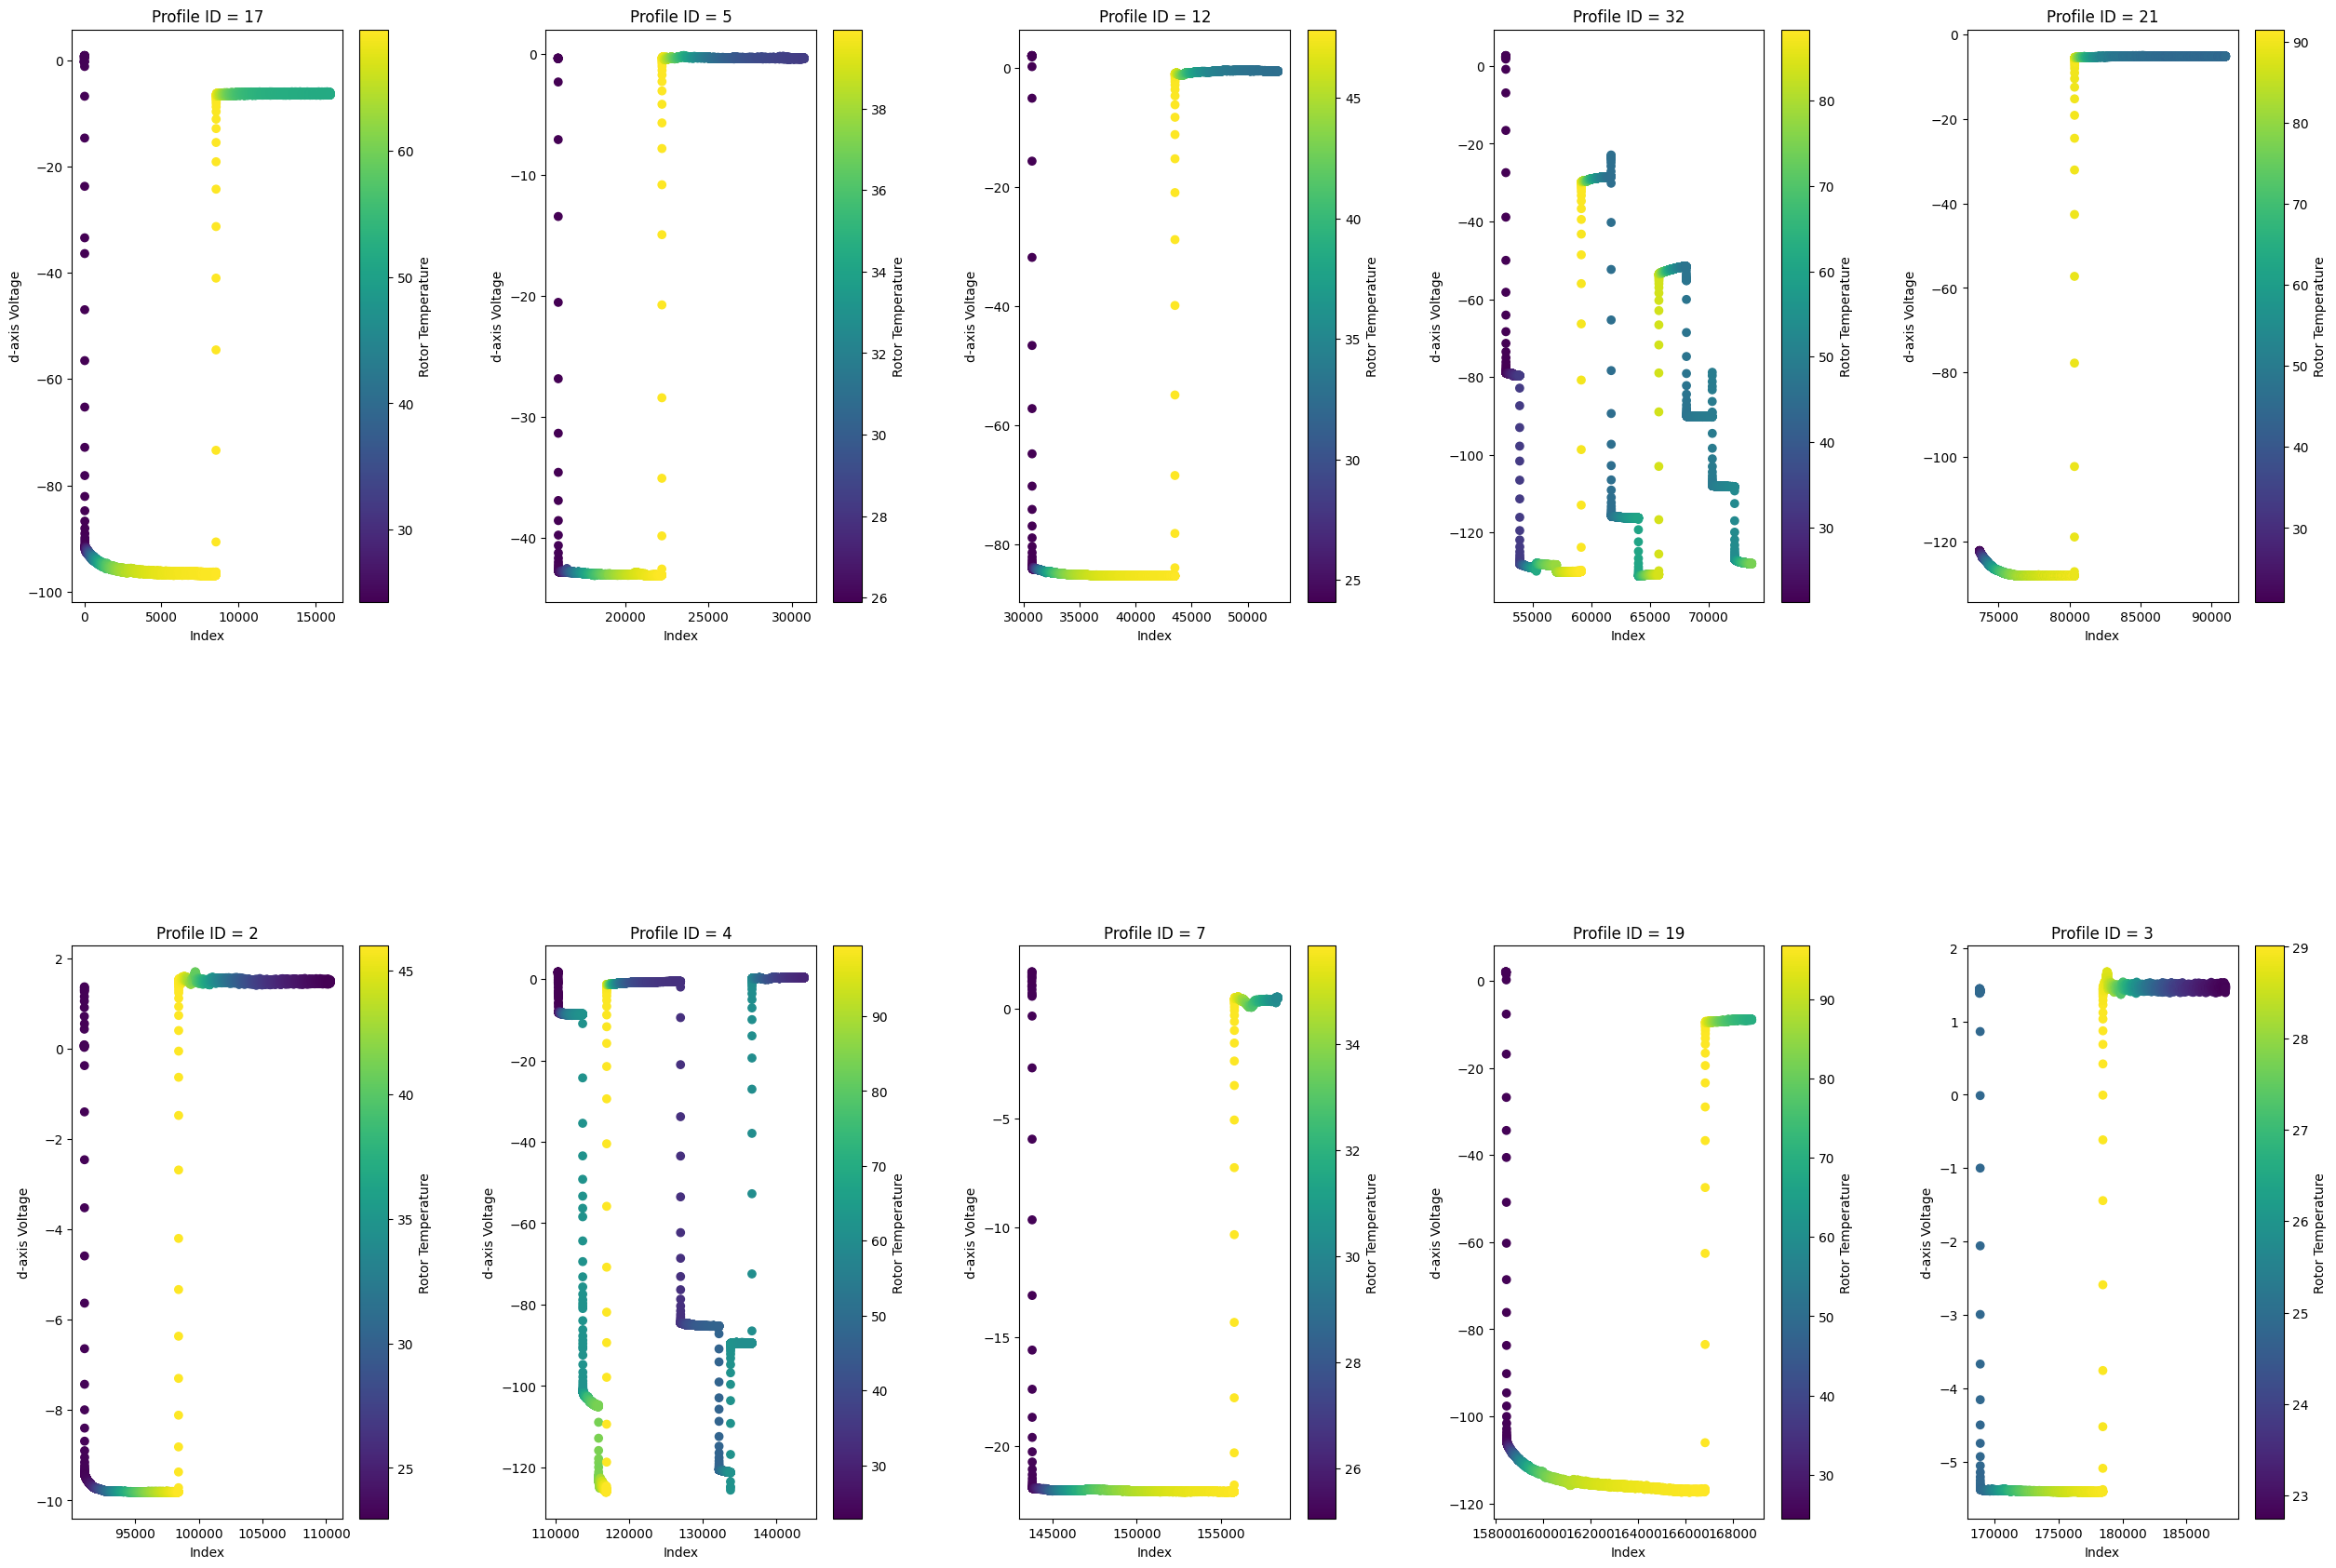

In [25]:
profiles = df['profile_id'].unique()
plt.figure(figsize=(30,20))
for i in range(10):
    profile_id=profiles[i]
    condition = df['profile_id']==profile_id

    plt.subplot(2,5,i+1)
    plt.scatter(df[condition].index, df[condition]['u_d'], c=df[condition]['pm'])
    plt.ylabel('d-axis Voltage')
    plt.xlabel('Index')
    plt.colorbar(label='Rotor Temperature')
    plt.title('Profile ID = '+str(profile_id))
    plt.subplots_adjust(wspace=0.4, hspace=0.6, left=0.1, right=0.9, top=0.9, bottom=0.1)

***Baseline Model Building***

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_ids, test_ids = train_test_split(profiles,test_size=0.2, random_state=42)
train_df = df[df['profile_id'].isin(train_ids)].copy()
test_df = df[df['profile_id'].isin(test_ids)].copy()

In [28]:
train_ids_sub, val_ids = train_test_split(train_ids, test_size=0.1, random_state=42)
train_df = df[df['profile_id'].isin(train_ids_sub)].copy()
val_df   = df[df['profile_id'].isin(val_ids)].copy()

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np

feature_cols = ['u_q','u_d','i_q','i_d','motor_speed','coolant','ambient','stator_yoke','stator_winding']
target_cols  = ['pm','torque']

X_train = train_df[feature_cols].values
y_train = train_df[target_cols].values

X_val = val_df[feature_cols].values
y_val = val_df[target_cols].values

X_test = test_df[feature_cols].values
y_test = test_df[target_cols].values

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

rf = RandomForestRegressor(
    n_estimators=50,        
    max_depth=100,         
    min_samples_leaf=5,    
    max_features='sqrt',   
    n_jobs=-1,
    random_state=42
)

print('Model Training Started')
rf.fit(X_train_scaled,y_train)

print('Model Training Ended')
for split_name, x_split, y_split in [
                    ('Train', X_train_scaled, y_train),
                    ('Val', X_val_scaled, y_val),
                    ('Test', X_test_scaled, y_test)
]:
    y_pred = rf.predict(x_split)
    rmse = np.sqrt(mean_squared_error(y_split, y_pred, multioutput='raw_values'))
    mae = mean_absolute_error(y_split, y_pred, multioutput='raw_values')
    print(f"{split_name} RMSE (pm, torque):", rmse)
    print(f"{split_name} MAE  (pm, torque):", mae)

Model Training Started
Model Training Ended
Train RMSE (pm, torque): [1.20691158 0.4505396 ]
Train MAE  (pm, torque): [0.5154981  0.14259041]
Val RMSE (pm, torque): [6.98622411 1.7082962 ]
Val MAE  (pm, torque): [5.10509261 0.98881916]
Test RMSE (pm, torque): [8.51127635 2.45285587]
Test MAE  (pm, torque): [6.27366075 1.21088143]
